In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score, train_test_split, StratifiedKFold, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.cluster import KMeans
from pathlib import Path
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (accuracy_score, classification_report, confusion_matrix, roc_auc_score,
                             recall_score, precision_score, f1_score)
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm
from transformers import BertTokenizer, BertModel,  AutoTokenizer, AutoModel

import torch
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Display all columns in DataFrame
pd.set_option('display.max_columns', None)

ValueError: mount failed

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/banrkupcy_dataset.csv')

In [ ]:
dir = Path("/content/drive/MyDrive/")
experiment_dir = dir / "Experiments_FINAL"

# EDA

In [ ]:
print(df.shape)
df.head()

(43405, 66)


,year,net profit / total assets,total liabilities / total assets,working capital / total assets,current assets / short-term liabilities,[(cash + short-term securities + receivables - short-term liabilities) / (operating expenses - depreciation)] * 365,retained earnings / total assets,EBIT / total assets,book value of equity / total liabilities,sales / total assets,equity / total assets,(gross profit + extraordinary items + financial expenses) / total assets,gross profit / short-term liabilities,(gross profit + depreciation) / sales,(gross profit + interest) / total assets,(total liabilities * 365) / (gross profit + depreciation),(gross profit + depreciation) / total liabilities,total assets / total liabilities,gross profit / total assets,gross profit / sales,(inventory * 365) / sales,sales (n) / sales (n-1),profit on operating activities / total assets,net profit / sales,gross profit (in 3 years) / total assets,(equity - share capital) / total assets,(net profit + depreciation) / total liabilities,profit on operating activities / financial expenses,working capital / fixed assets,logarithm of total assets,(total liabilities - cash) / sales,(gross profit + interest) / sales,(current liabilities * 365) / cost of products sold,operating expenses / short-term liabilities,operating expenses / total liabilities,profit on sales / total assets,total sales / total assets,(current assets - inventories) / long-term liabilities,constant capital / total assets,profit on sales / sales,(current assets - inventory - receivables) / short-term liabilities,total liabilities / ((profit on operating activities + depreciation) * (12/365)),profit on operating activities / sales,rotation receivables + inventory turnover in days,(receivables * 365) / sales,net profit / inventory,(current assets - inventory) / short-term liabilities,(inventory * 365) / cost of products sold,EBITDA (profit on operating activities - depreciation) / total assets,EBITDA (profit on operating activities - depreciation) / sales,current assets / total liabilities,short-term liabilities / total assets,(short-term liabilities * 365) / cost of products sold,equity / fixed assets,constant capital / fixed assets,working capital,(sales - cost of products sold) / sales,(current assets - inventory - short-term liabilities) / (sales - gross profit - depreciation),total costs / total sales,long-term liabilities / equity,sales / inventory,sales / receivables,(short-term liabilities * 365) / sales,sales / short-term liabilities,sales / fixed assets,bankruptcy
0,1,0.200550,0.37951,0.39641,2.0472,32.3510,0.38825,0.249760,1.33050,1.1389,0.50494,0.249760,0.65980,0.166600,0.249760,497.42,0.73378,2.6349,0.249760,0.149420,43.370,1.2479,0.21402,0.119980,0.47706,0.50494,0.60411,1.45820,1.7615,5.9443,0.11788,0.149420,94.14,3.8772,0.56393,0.21402,1.7410,593.2700,0.50591,0.128040,0.662950,0.051402,0.128040,114.42,71.050,1.00970,1.52250,49.394,0.185300,0.110850,2.0420,0.37854,0.25792,2.2437,2.2480,348690.0,0.121960,0.39718,0.87804,0.001924,8.4160,5.1372,82.658,4.4158,7.4277,0
1,1,0.209120,0.49988,0.47225,1.9447,14.7860,0.00000,0.258340,0.99601,1.6996,0.49788,0.261140,0.51680,0.158350,0.258340,677.96,0.53838,2.0005,0.258340,0.152000,87.981,1.4293,0.24806,0.123040,NaN,0.39542,0.43992,88.44400,16.9460,3.6884,0.26969,0.152000,122.17,2.9876,2.98760,0.20616,1.6996,NaN,0.49788,0.121300,0.086422,0.064371,0.145950,199.49,111.510,0.51045,1.12520,100.130,0.237270,0.139610,1.9447,0.49988,0.33472,17.8660,17.8660,2304.6,0.121300,0.42002,0.85300,0.000000,4.1486,3.2732,107.350,3.4000,60.9870,0
2,1,0.248660,0.69592,0.26713,1.5548,-1.1523,0.00000,0.309060,0.43695,1.3090,0.30408,0.312580,0.64184,0.244350,0.309060,794.16,0.45961,1.4369,0.309060,0.236100,73.133,1.4283,0.30260,0.189960,NaN,0.28932,0.37282,86.01100,1.0627,4.3749,0.41929,0.238150,176.93,2.0630,1.42740,0.31565,1.3090,2.3019,0.51537,0.241140,0.322020,0.074020,0.231170,165.51,92.381,0.94807,1.01010,96.372,0.291810,0.222930,1.0758,0.48152,0.48474,1.2098,2.0504,63

In [ ]:
df["bankruptcy"].value_counts()

,count
bankruptcy,
0,41314
1,2091


In [ ]:
2091 / 41314 * 100

5.061238321150215

In [ ]:
df.describe()

,year,net profit / total assets,total liabilities / total assets,working capital / total assets,current assets / short-term liabilities,[(cash + short-term securities + receivables - short-term liabilities) / (operating expenses - depreciation)] * 365,retained earnings / total assets,EBIT / total assets,book value of equity / total liabilities,sales / total assets,equity / total assets,(gross profit + extraordinary items + financial expenses) / total assets,gross profit / short-term liabilities,(gross profit + depreciation) / sales,(gross profit + interest) / total assets,(total liabilities * 365) / (gross profit + depreciation),(gross profit + depreciation) / total liabilities,total assets / total liabilities,gross profit / total assets,gross profit / sales,(inventory * 365) / sales,sales (n) / sales (n-1),profit on operating activities / total assets,net profit / sales,gross profit (in 3 years) / total assets,(equity - share capital) / total assets,(net profit + depreciation) / total liabilities,profit on operating activities / financial expenses,working capital / fixed assets,logarithm of total assets,(total liabilities - cash) / sales,(gross profit + interest) / sales,(current liabilities * 365) / cost of products sold,operating expenses / short-term liabilities,operating expenses / total liabilities,profit on sales / total assets,total sales / total assets,(current assets - inventories) / long-term liabilities,constant capital / total assets,profit on sales / sales,(current assets - inventory - receivables) / short-term liabilities,total liabilities / ((profit on operating activities + depreciation) * (12/365)),profit on operating activities / sales,rotation receivables + inventory turnover in days,(receivables * 365) / sales,net profit / inventory,(current assets - inventory) / short-term liabilities,(inventory * 365) / cost of products sold,EBITDA (profit on operating activities - depreciation) / total assets,EBITDA (profit on operating activities - depreciation) / sales,current assets / total liabilities,short-term liabilities / total assets,(short-term liabilities * 365) / cost of products sold,equity / fixed assets,constant capital / fixed assets,working capital,(sales - cost of products sold) / sales,(current assets - inventory - short-term liabilities) / (sales - gross profit - depreciation),total costs / total sales,long-term liabilities / equity,sales / inventory,sales / receivables,(short-term liabilities * 365) / sales,sales / short-term liabilities,sales / fixed assets,bankruptcy
count,43405.000000,43397.000000,43397.000000,43397.000000,43271.000000,4.331600e+04,43397.000000,43397.000000,43311.000000,43396.000000,43397.000000,43361.000000,43271.000000,43278.000000,43397.000000,4.336900e+04,43310.000000,43311.000000,43397.000000,43277.000000,4.327800e+04,37551.000000,43397.000000,43278.000000,42483.000000,43397.000000,43310.000000,4.064100e+04,42593.000000,43397.000000,43278.000000,43278.000000,4.303700e+04,43271.000000,43311.000000,43397.000000,43397.000000,24421.000000,43397.000000,43278.000000,43271.000000,42651.000000,43278.000000,4.327800e+04,4.327800e+04,41258.000000,43270.000000,4.310800e+04,43396.000000,43278.000000,43311.000000,43397.000000,43104.000000,42593.000000,42593.000000,4.340400e+04,4.327800e+04,43398.000000,4.332100e+04,43398.000000,4.125300e+04,43303.000000,4.327800e+04,43271.000000,42593.000000,43405.000000
mean,2.939753,0.035160,0.590212,0.114431,6.314702,-3.853480e+02,-0.056107,0.093478,12.640779,2.652166,0.626868,0.131075,1.132430,0.809544,0.093489,1.991390e+03,1.411167,13.802535,0.098565,0.156277,2.430209e+02,3.884997,0.113923,0.138582,0.270012,0.392844,1.263864,1.107970e+03,6.003208,4.005020,7.370821,0.176847,1.163286e+03,8.636016,5.411439,0.111908,2.911241,105.075944,0.724357,-0.289102,2.147411,7.723198,-0.142514,1.074071e+03,8.310348e+02,14.822592,5.428857,3.577488e+02,0.028584,-0.482584,5.835373,0.483521,6.478459,23.772623,24.654700,7.672346e+03,-2.621959e+01,-0.010510,3.002644e+01,

In [ ]:
df.bankruptcy = df.bankruptcy.astype(int)

In [ ]:
df.groupby("bankruptcy")["year"].value_counts()

bankruptcy  year
0           3       10008
            2        9773
            4        9277
            1        6756
            5        5500
1           4         515
            3         495
            5         410
            2         400
            1         271
Name: count, dtype: int64

In [ ]:
df.isna().sum().sum()

41322

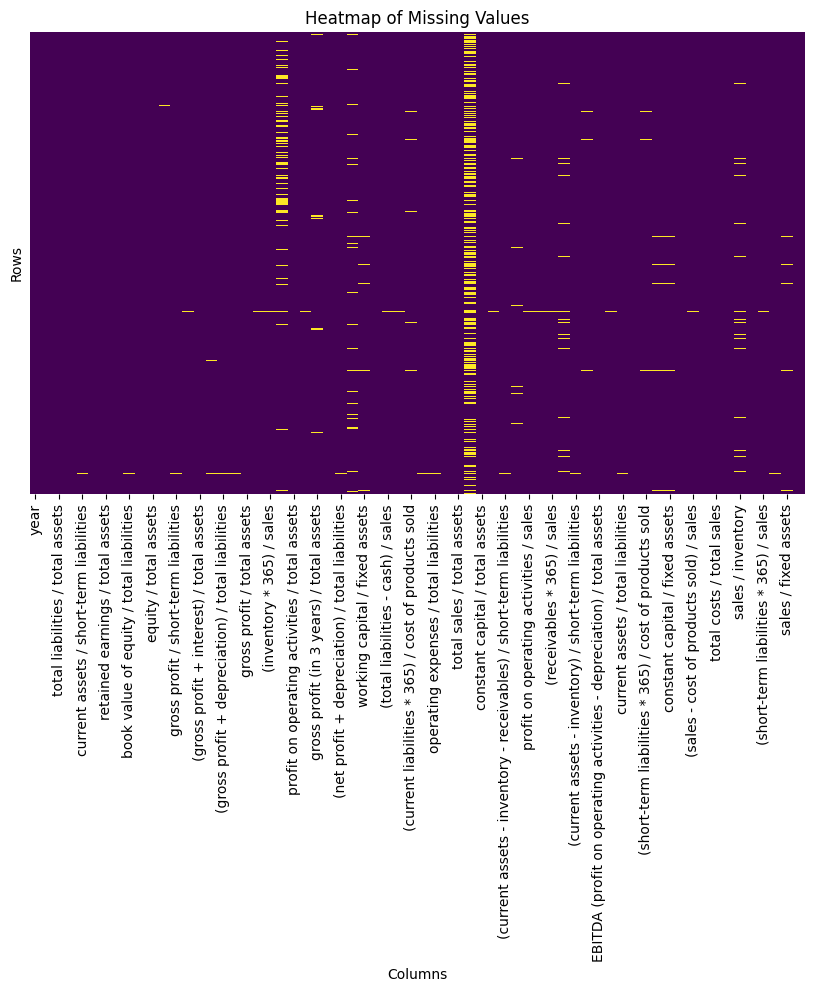

In [ ]:
# Plot a heatmap of missing values
plt.figure(figsize=(10, 6))
sns.heatmap(df.isna(), cbar=False, cmap='viridis', yticklabels=False)
plt.title('Heatmap of Missing Values')
plt.xlabel('Columns')
plt.ylabel('Rows')
plt.show()

## K-Means

In [ ]:
columns_to_cluster = list(df.columns)
# columns_to_cluster.remove("year")
columns_to_cluster.remove("bankruptcy")
data = df[columns_to_cluster]
data = data.fillna(data.median())

# Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# Initialize variables
inertia = []  # To store the sum of squared distances for each k
k_values = range(1, 30, 3)  # Testing k from 1 to 10

print("Starting K-Means computation for elbow plot...")

# Loop through different values of k
for k in k_values:
    print(f"Performing K-Means for k={k}...")
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)  # Store the inertia (sum of squared distances)
    print(f"k={k}: Inertia={kmeans.inertia_}")

# Plot the elbow plot
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia, marker='o')
plt.title('Elbow Plot for K-Means')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (Sum of Squared Distances)')
plt.xticks(k_values)
plt.grid()
plt.show()

Starting K-Means computation for elbow plot...
Performing K-Means for k=1...
k=1: Inertia=2821325.000000003
Performing K-Means for k=4...
k=4: Inertia=2016608.3589010404
Performing K-Means for k=7...
k=7: Inertia=1631726.465045472
Performing K-Means for k=10...


KeyboardInterrupt: 

# Functions

### Models

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [ ]:
def perform_kfold_grid_search(model, param_grid, X_train, y_train, folds=3):
    """
    Performs grid search with k-fold cross-validation to find the best hyperparameters.

    Parameters:
        model: The machine learning estimator to optimize.
        param_grid (dict): Dictionary with parameters names as keys and lists of parameter settings to try.
        X_train: Training feature data.
        y_train: Training target data.
        folds (int, optional): Number of cross-validation folds. Default is 5.

    Returns:
        dict: Best parameters found by grid search.
    """
    kfold = StratifiedKFold(n_splits=folds, shuffle=True, random_state=41)
    grid_search = GridSearchCV(model, param_grid, cv=kfold, verbose=1, n_jobs=-1)
    grid_search.fit(X_train, y_train)
    best_params = grid_search.best_params_
    print("Best param:")
    print(best_params)
    return best_params

def perform_kfold_random_search(model, param_dist, X_train, y_train, folds=3, n_iter=10):
    """
    Performs randomized search with k-fold cross-validation to find the best hyperparameters.

    Parameters:
        model: The machine learning estimator to optimize.
        param_dist (dict): Dictionary with parameters names as keys and lists/ranges of parameter settings to sample.
        X_train: Training feature data.
        y_train: Training target data.
        folds (int, optional): Number of cross-validation folds. Default is 3.
        n_iter (int, optional): Number of parameter settings sampled. Default is 20.

    Returns:
        dict: Best parameters found by randomized search.
    """
    kfold = StratifiedKFold(n_splits=folds, shuffle=True, random_state=41)
    random_search = RandomizedSearchCV(model, param_distributions=param_dist, n_iter=n_iter,
                                       cv=kfold, verbose=1, random_state=41, n_jobs=-1)
    random_search.fit(X_train, y_train)
    best_params = random_search.best_params_
    print("Best param:")
    print(best_params)
    return best_params

In [ ]:
def logistic_regression(X_train, y_train, X_test, y_test, random_search=1):
    """
    Trains and evaluates a Logistic Regression model with hyperparameter tuning.

    Parameters:
        X_train (pd.DataFrame): Training feature data.
        y_train (pd.Series or array-like): Training target data.
        X_test (pd.DataFrame): Testing feature data.
        y_test (pd.Series or array-like): Testing target data.

    Returns:
        accuracy_train (float): Accuracy on the training set.
        accuracy_test (float): Accuracy on the testing set.
        coef_df (pd.DataFrame): DataFrame containing features, coefficients (and odds ratios) sorted by coefficient magnitude.
    """
    # Scale the data
    feature_names = X_train.columns
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    X_train_scaled = pd.DataFrame(X_train_scaled, columns=feature_names)
    X_test_scaled = pd.DataFrame(X_test_scaled, columns=feature_names)

    # Define the logistic regression model and parameter grid
    param_grid = {
        'penalty': ['l1', 'l2'],
        "solver": ["liblinear"],
        'C': [0.01 , 0.1, 1, 10]
    }

        # Perform hyperparameter tuning
    if random_search:
        best_params = perform_kfold_random_search(LogisticRegression(random_state=41, max_iter=200), param_grid, X_train_scaled, y_train)
    else:
        best_params = perform_kfold_grid_search(LogisticRegression(random_state=41, max_iter=200), param_grid, X_train_scaled, y_train)

    # Train the logistic regression model with the best regularization parameter
    final_logreg = LogisticRegression(**best_params)
    final_logreg.fit(X_train_scaled, y_train)

    return final_logreg


def random_forest(X_train, y_train, X_test, y_test, random_search=1):
    """
    Trains and evaluates a Random Forest classifier with hyperparameter tuning.

    Parameters:
        X_train (pd.DataFrame): Training feature data.
        y_train (pd.Series or array-like): Training target data.
        X_test (pd.DataFrame): Testing feature data.
        y_test (pd.Series or array-like): Testing target data.

    Returns:
        accuracy_train (float): Accuracy on the training set.
        accuracy_test (float): Accuracy on the testing set.
        feature_importances (pd.DataFrame): DataFrame containing features and their importance scores sorted by importance magnitude.
    """
    # Define the parameter grid for Random Forest classifier tuning
    param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 5],
    }

    # Perform search with cross-validation to find the best parameters
    if random_search:
        best_params = perform_kfold_random_search(RandomForestClassifier(random_state=41), param_grid, X_train, y_train)
    else:
        best_params = perform_kfold_grid_search(RandomForestClassifier(random_state=41), param_grid, X_train, y_train)

    # Train the Random Forest classifier with the best parameters
    final_rf_classifier = RandomForestClassifier(random_state=41, **best_params)
    final_rf_classifier.fit(X_train, y_train)

    return final_rf_classifier


def xg_boost(X_train, y_train, X_test, y_test, random_search=1):
    """
    Trains and evaluates an XGBoost classifier with hyperparameter tuning.

    Parameters:
        X_train (pd.DataFrame or np.array): Training feature data.
        y_train (pd.Series or array-like): Training target data.
        X_test (pd.DataFrame or np.array): Testing feature data.
        y_test (pd.Series or array-like): Testing target data.
        random_search (bool): Whether to use random search for hyperparameter tuning.

    Returns:
        final_xgb_classifier (XGBClassifier): Trained XGBoost classifier.
    """
    # Detect GPU availability
    device = 'gpu' if torch.cuda.is_available() else 'cpu'
    print(f"Using device: {device.upper()}")

    # Move data to GPU if GPU is available
    if device == 'gpu':
        X_train = np.array(X_train, dtype=np.float32)
        y_train = np.array(y_train, dtype=np.float32)
        X_test = np.array(X_test, dtype=np.float32)
        y_test = np.array(y_test, dtype=np.float32)

    # Define the parameter grid
    param_grid = {
        'n_estimators': [50, 100, 200],
        'max_depth': [3, 5, 10],
        'learning_rate': [0.1, 0.01, 0.001],
        'subsample': [0.5, 0.8, 1.0],
        'device': [device],  # Use GPU if available
    }

    # Perform search with cross-validation to find the best parameters
    if random_search:
        best_params = perform_kfold_random_search(XGBClassifier(random_state=41), param_grid, X_train, y_train)
    else:
        best_params = perform_kfold_grid_search(XGBClassifier(random_state=41), param_grid, X_train, y_train)

    # Train the XGBoost classifier with the best parameters
    final_xgb_classifier = XGBClassifier(random_state=41, **best_params)
    final_xgb_classifier.fit(X_train, y_train)

    return final_xgb_classifier

## Evaluation

In [ ]:
def evaluate_model(model, X_train, y_train, X_test, y_test):
    """
    Evaluates the model on training and testing data, providing accuracy, AUC, sensitivity, and specificity.

    Parameters:
        model: Trained machine learning model.
        X_train: Training feature data.
        y_train: Training target data.
        X_test: Testing feature data.
        y_test: Testing target data.

    Returns:
        metrics (dict): Dictionary with accuracy, AUC, sensitivity, and specificity for train and test sets.
    """

    def calculate_metrics(y_true, y_pred, y_prob=None):
        accuracy = accuracy_score(y_true, y_pred)

        # Check if binary or multi-class for AUC calculation
        if y_prob is not None:
            if len(set(y_true)) == 2:  # Binary classification
                auc = roc_auc_score(y_true, y_prob[:, 1])
            else:  # Multi-class classification
                auc = roc_auc_score(y_true, y_prob, multi_class='ovr')
        else:
            auc = None

        # Calculate sensitivity and specificity for binary classification
        if len(set(y_true)) == 2:  # Binary classification
            tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
            sensitivity = tp / (tp + fn)
            specificity = tn / (tn + fp)
        else:
            sensitivity = None
            specificity = None

        return accuracy, auc, sensitivity, specificity

    # Evaluate on the test set
    y_pred_test = model.predict(X_test)
    y_prob_test = model.predict_proba(X_test) if hasattr(model, "predict_proba") else None
    accuracy_test, auc_test, sensitivity_test, specificity_test = calculate_metrics(y_test, y_pred_test, y_prob_test)

    # Evaluate on the train set
    y_pred_train = model.predict(X_train)
    y_prob_train = model.predict_proba(X_train) if hasattr(model, "predict_proba") else None
    accuracy_train, auc_train, sensitivity_train, specificity_train = calculate_metrics(y_train, y_pred_train, y_prob_train)

    metrics = {
        # 'accuracy_train': accuracy_train,
        # 'auc_train': auc_train,
        # 'sensitivity_train': sensitivity_train,
        # 'specificity_train': specificity_train,
        'accuracy_test': accuracy_test,
        'auc_test': auc_test,
        'sensitivity_test': sensitivity_test,
        # 'specificity_test': specificity_test
    }

    print("Performance Summary:")
    print(f"Train - AUC: {auc_train:.3f}, Sensitivity: {sensitivity_train:.3f}")
    print(f"Test - AUC: {auc_test:.3f}, Sensitivity: {sensitivity_test:.3f}")

    return metrics


def eval_logreg(logreg: LogisticRegression, X_train, y_train, X_test, y_test):

    feature_names = X_train.columns
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    X_train_scaled = pd.DataFrame(X_train_scaled, columns=feature_names)
    X_test_scaled = pd.DataFrame(X_test_scaled, columns=feature_names)

    # Evaluate the model
    metrics = evaluate_model(logreg, X_train_scaled, y_train, X_test_scaled, y_test)

    # Create DataFrame of sorted coefficients and odds ratios
    coefficients = logreg.coef_[0]
    odds_ratios = np.exp(coefficients)

    coef_df = pd.DataFrame({
        'Feature': feature_names,
        'Importance': coefficients, # this is called importance but is actually the coefficient (importance takes abs value)
        # 'Odds Ratio': odds_ratios
    })

    coef_df = coef_df.reindex(coef_df['Importance'].abs().sort_values(ascending=False).index)

    return metrics, coef_df


def eval_rf(rf: RandomForestClassifier, X_train, y_train, X_test, y_test):

    # Evaluate the model
    metrics = evaluate_model(rf, X_train, y_train, X_test, y_test)

    # Feature Importance
    importance_rf = rf.feature_importances_

    feature_importances = sorted(zip(X_train.columns, importance_rf), key=lambda x: x[1], reverse=True)
    feature_importances = pd.DataFrame(feature_importances, columns=["Feature", "Importance"]).sort_values(by="Importance", ascending=False)

    return metrics, feature_importances


def eval_xgb(xgb: XGBClassifier, X_train, y_train, X_test, y_test):

    # Evaluate the model
    metrics = evaluate_model(xgb, X_train, y_train, X_test, y_test)

    # Print ranked feature importance
    importance_xgb = xgb.feature_importances_
    feature_importances = sorted(zip(X_train.columns, importance_xgb), key=lambda x: x[1], reverse=True)
    feature_importances = pd.DataFrame(feature_importances, columns=["Feature", "Importance"]).sort_values(by="Importance", ascending=False)

    return metrics, feature_importances


def plot_model_feature_importance(lr_fi_df=None, rf_fi_df=None, xgb_fi_df=None, top_x=10):
    """
    Plot the top features for each individual model: Logistic Regression, Random Forest, and XGBoost.

    Parameters:
        lr_fi_df (pd.DataFrame): DataFrame containing feature names and coefficients for logistic regression.
        rf_fi_df (pd.DataFrame): DataFrame containing feature names and importance scores for random forest.
        xgb_fi_df (pd.DataFrame): DataFrame containing feature names and importance scores for XGBoost.
        top_x (int): The number of top features to display. Default is 10.
    """
    blue_color = "skyblue"

    # Plot for Logistic Regression
    if lr_fi_df is not None:
      plt.figure(figsize=(8, 6))
      sns.barplot(x="Importance", y="Feature", data=lr_fi_df.iloc[:top_x], color=blue_color)
      plt.xlabel('Coefficient Value')
      plt.ylabel('Feature')
      plt.title('Top Feature Coefficients in Logistic Regression')
      plt.show()

    if rf_fi_df is not None:
      # Plot for Random Forest
      plt.figure(figsize=(8, 6))
      sns.barplot(x="Importance", y="Feature", data=rf_fi_df.iloc[:top_x], color=blue_color)
      plt.xlabel('Importance Score')
      plt.ylabel('Feature')
      plt.title('Top Features in Random Forest')
      plt.show()

    if xgb_fi_df is not None:
      # Plot for XGBoost
      plt.figure(figsize=(8, 6))
      sns.barplot(x="Importance", y="Feature", data=xgb_fi_df.iloc[:top_x], color=blue_color)
      plt.xlabel('Importance Score')
      plt.ylabel('Feature')
      plt.title('Top Features in XGBoost')
      plt.show()


def analyze_overall_feature_importance(lr_fi_df, rf_fi_df, xgb_fi_df, top_x=10):
    """
    Analyze and visualize the overall importance of features across logistic regression,
    random forest, and XGBoost models by normalizing feature coefficients/importance scores,
    and selecting the top features based on summed normalized importance and rank.

    Parameters:
        lr_fi_df (pd.DataFrame): DataFrame containing feature names and coefficients for logistic regression.
        rf_fi_df (pd.DataFrame): DataFrame containing feature names and importance scores for random forest.
        xgb_fi_df (pd.DataFrame): DataFrame containing feature names and importance scores for XGBoost.
        top_x (int): The number of top features to display and return based on summed normalized importance or rank. Default is 10.

    Returns:
        pd.DataFrame: A DataFrame of the top features based on summed normalized importance, with their importance scores.
    """
    lr_fi_copy = lr_fi_df.copy()
    rf_fi_copy = rf_fi_df.copy()
    xgb_fi_copy = xgb_fi_df.copy()

    scaler = MinMaxScaler()

    # Normalize coefficients/importance
    lr_fi_copy['Normalized Importance'] = scaler.fit_transform(lr_fi_copy['Importance'].abs().values.reshape(-1, 1))
    rf_fi_copy['Normalized Importance'] = scaler.fit_transform(rf_fi_copy['Importance'].values.reshape(-1, 1))
    xgb_fi_copy['Normalized Importance'] = scaler.fit_transform(xgb_fi_copy['Importance'].values.reshape(-1, 1))

    # Rank features by normalized importance
    lr_fi_copy['Rank'] = lr_fi_copy['Normalized Importance'].rank(ascending=False).astype(int)
    rf_fi_copy['Rank'] = rf_fi_copy['Normalized Importance'].rank(ascending=False).astype(int)
    xgb_fi_copy['Rank'] = xgb_fi_copy['Normalized Importance'].rank(ascending=False).astype(int)

    # Merge the dataframes
    merged_df = pd.merge(
        lr_fi_copy[['Feature', 'Rank', 'Normalized Importance']],
        rf_fi_copy[['Feature', 'Rank', 'Normalized Importance']],
        on='Feature',
        suffixes=('_LogReg', '_RF')
    )
    merged_df = pd.merge(
        merged_df,
        xgb_fi_copy[['Feature', 'Rank', 'Normalized Importance']],
        on='Feature'
    )
    merged_df = merged_df.rename(columns={'Rank': 'Rank_XGB', 'Normalized Importance': 'Normalized Importance_XGB'})

    # Sum of normalized importance
    merged_df['Sum_Normalized_Importance'] = merged_df[
        ['Normalized Importance_LogReg', 'Normalized Importance_RF', 'Normalized Importance_XGB']].sum(axis=1)
    top_features_sum_importance = merged_df.sort_values(by='Sum_Normalized_Importance', ascending=False).head(top_x)

    # Plot top features by summed normalized importance
    plt.figure(figsize=(10, 6))
    plt.barh(top_features_sum_importance['Feature'], top_features_sum_importance['Sum_Normalized_Importance'],
             color='dodgerblue')
    plt.xlabel('Summed Normalized Importance')
    plt.title('Top Features by Summed Normalized Importance')
    plt.gca().invert_yaxis()
    plt.show()

    top_features_sum_importance.set_index("Feature", inplace=True)
    return top_features_sum_importance

# Experiments

## Functions

In [ ]:
def split_data_by_year(df, train_years=range(1, 4), test_years=range(4, 11)):
    """
    Splits the data into training and testing datasets based on specified year ranges.

    Parameters:
        df (pd.DataFrame): The input DataFrame.
        train_years (iterable, optional): Years to include in the training set (default: range(1, 4)).
        test_years (iterable, optional): Years to include in the testing set (default: range(4, 11)).

    Returns:
        tuple: A tuple containing the training DataFrame and the testing DataFrame.
    """
    train_df = df[df['year'].isin(train_years)].copy()
    test_df = df[df['year'].isin(test_years)].copy()
    return train_df, test_df

In [ ]:
def simplify_column_name(column_name):
    return (
        column_name.replace(" ", "_")
                   .replace("(", "")
                   .replace(")", "")
                   .replace("/", "_")
                   .replace("*", "_")
                   .replace("-", "_")
                   .replace(".", "_")
                   .replace(",", "_")
                   .replace("+", "_")
                   .replace("[", "")
                   .replace("]", "")
                   .replace("<", "")
                   .replace(">", "")
    )

# simplified_columns = [simplify_column_name(col) for col in original_columns]
# column_mapping = dict(zip(simplified_columns, original_columns))

In [ ]:
def get_tabular_data(df):
    excluded_columns = ["bankruptcy", "year", "all_text"]
    tabular_columns = [col for col in df.columns if "emb" not in col and col not in excluded_columns]
    res = df[tabular_columns].copy()
    res.columns = [simplify_column_name(col) for col in tabular_columns]
    return res

In [ ]:
def get_embeddings_data(df):
    tabular_columns = [col for col in df.columns if "emb" in col]
    res = df[tabular_columns].copy()
    res.columns = [simplify_column_name(col) for col in tabular_columns]
    return res

In [ ]:
def fit_models(X_train, y_train, X_test, y_test, return_model=False):

  # logreg = logistic_regression(X_train, y_train, X_train, y_test, random_search=1)
  # rf = random_forest(X_train, y_train, X_train, y_test)
  xgb = xg_boost(X_train, y_train, X_test, y_test)

  # print("Logistic regression")
  # lr_metrics, _ = eval_logreg(logreg, X_train_bert_raw_embeddings, y_train, X_test_bert_raw_embeddings, y_test)
  # print("="*50)
  # print("Random Forest")
  # rf_metrics, _ = eval_rf(rf, X_train_bert_raw_embeddings, y_train, X_test_bert_raw_embeddings, y_test)
  print("="*50)
  print("XGBoost")
  xgb_metrics, _ = eval_xgb(xgb, X_train, y_train, X_test, y_test)

  if return_model:
    return xgb, xgb_metrics

  return xgb_metrics

## Random vs Optimization undersanpling

In [ ]:
bert_df = pd.read_csv(experiment_dir / "bert_plain_df_clean.csv", index_col=0)
train_random, test = split_data_by_year(bert_df)

y_train = train_random.bankruptcy.astype(int)
y_test = test.bankruptcy.astype(int)

train_random = get_tabular_data(train_random)
test = get_tabular_data(test)

train_road = pd.read_csv(dir / "sampled_data_ROAD.csv", index_col=0)
train_road = get_tabular_data(train_road)

In [ ]:
y_test

In [ ]:
print(train_random.shape)
train_random.head(3)

In [ ]:
print(train_road.shape)
train_road.head(3)

In [ ]:
random_res = fit_models(train_random, y_train, test, y_test)

In [ ]:
road_res = fit_models(train_road, y_train, test, y_test)

## Bert vs FinBert

### Bert

In [ ]:
bert_raw = pd.read_csv(experiment_dir / "bert_plain_df_raw.csv", index_col=0)
train_bert_raw, test_bert_raw = split_data_by_year(bert_raw)

In [ ]:
bert_clean = pd.read_csv(experiment_dir / "bert_plain_df_clean.csv", index_col=0)
train_bert_clean, test_bert_clean = split_data_by_year(bert_clean)

#### TabText

In [ ]:
# Raw Data

X_train_bert_raw_embeddings = get_embeddings_data(train_bert_raw)
X_test_bert_raw_embeddings = get_embeddings_data(test_bert_raw)

y_train = train_bert_raw.bankruptcy.astype(int)
y_test = test_bert_raw.bankruptcy.astype(int)

# xgb_metrics_bert_raw = fit_models(X_train_bert_raw_embeddings, y_train, X_test_bert_raw_embeddings, y_test)
xgb_raw = xg_boost(X_train_bert_raw_embeddings, y_train, X_test_bert_raw_embeddings, y_test)
xgb_metrics_bert_raw, _ = eval_xgb(xgb_raw, X_train_bert_raw_embeddings, y_train, X_test_bert_raw_embeddings, y_test)
xgb_metrics_bert_raw

In [ ]:
# Clean Data

X_train_bert_clean_embeddings = get_embeddings_data(train_bert_clean)
X_test_bert_clean_embeddings = get_embeddings_data(test_bert_clean)

y_train = train_bert_clean.bankruptcy.astype(int)
y_test = test_bert_clean.bankruptcy.astype(int)

xgb_metrics_bert_clean = fit_models(X_train_bert_clean_embeddings, y_train, X_test_bert_clean_embeddings, y_test)

#### Tabular

In [ ]:
X_train_tabular = get_tabular_data(train_bert_clean)
X_test_tabular = get_tabular_data(test_bert_clean)

y_train = train_bert_clean.bankruptcy.astype(int)
y_test = test_bert_clean.bankruptcy.astype(int)

In [ ]:
X_train_tabular = get_tabular_data(train_bert_clean)
X_test_tabular = get_tabular_data(test_bert_clean)

y_train = train_bert_clean.bankruptcy.astype(int)
y_test = test_bert_clean.bankruptcy.astype(int)

# xgb_metrics_tabular = fit_models(X_train_tabular, y_train, X_test_tabular, y_test)
xgb_tab = xg_boost(X_train_tabular, y_train, X_test_tabular, y_test)
xgb_metrics_tabular, _ = eval_xgb(xgb_tab, X_train_tabular, y_train, X_test_tabular, y_test)

In [ ]:
xgb_raw.predict_proba(X_test_bert_raw_embeddings)
xgb_tab.predict_proba(X_test_tabular)

#### Multi-Modal

In [ ]:
# use bert trained on clean data because it performed better

X_train_bert_multimodal = X_train_bert_raw_embeddings.merge(X_train_tabular, left_index=True, right_index=True, how="inner")
X_test_bert_multimodal = X_test_bert_clean_embeddings.merge(X_test_tabular, left_index=True, right_index=True, how="inner")

xgb_metrics_bert_multimodal = fit_models(X_train_bert_multimodal, y_train, X_test_bert_multimodal, y_test)

### Ensamble?

In [ ]:
prob_raw = xgb_raw.predict_proba(X_test_bert_raw_embeddings)[:, 1]  # Probability for class 1
prob_tab = xgb_tab.predict_proba(X_test_tabular)[:, 1]
# prob_ensemble = (prob_raw + prob_tab) / 2

meta_features = np.column_stack((prob_raw, prob_tab))

from sklearn.linear_model import LogisticRegression

# Train a meta-model
meta_model = LogisticRegression()
meta_model.fit(meta_features, y_test)

prob_raw_test = xgb_raw.predict_proba(X_test_bert_raw_embeddings)[:, 1]
prob_tab_test = xgb_tab.predict_proba(X_test_tabular)[:, 1]
meta_features_test = np.column_stack((prob_raw_test, prob_tab_test))

# Predict with the meta-model
ensemble_predictions = meta_model.predict(meta_features_test)
ensemble_probabilities = meta_model.predict_proba(meta_features_test)[:, 1]

print("Ensemble Model Performance:")
print("Accuracy:", accuracy_score(y_test, ensemble_predictions))
print("AUC:", roc_auc_score(y_test, ensemble_probabilities))
print("Sensitivity (Recall):", recall_score(y_test, ensemble_predictions))

###Comparison

In [ ]:
df_comparison_bert = pd.DataFrame({
    'Metric': list(xgb_metrics_bert_raw.keys()),
    'BERT Raw Embeddings': list(xgb_metrics_bert_raw.values()),
    'BERT Clean Embeddings': list(xgb_metrics_bert_clean.values()),
    'Tabular': list(xgb_metrics_tabular.values()),
    'Multi-Modal': list(xgb_metrics_bert_multimodal.values())
})

df_comparison_bert

### FinBert

In [ ]:
finbert_raw = pd.read_csv(experiment_dir / "finbert_plain_df_raw.csv", index_col=0)
train_finbert_raw, test_finbert_raw = split_data_by_year(finbert_raw)

In [ ]:
finbert_clean = pd.read_csv(experiment_dir / "finbert_plain_df_clean.csv", index_col=0)
train_finbert_clean, test_finbert_clean = split_data_by_year(finbert_clean)

#### TabText

In [ ]:
# Raw Data

X_train_finbert_raw = get_embeddings_data(train_finbert_raw)
X_test_finbert_raw = get_embeddings_data(test_finbert_raw)

y_train = train_finbert_raw.bankruptcy.astype(int)
y_test = test_finbert_raw.bankruptcy.astype(int)

xgb_metrics_finbert_raw = fit_models(X_train_finbert_raw, y_train, X_test_finbert_raw, y_test)

In [ ]:
# Clean Data
X_train_finbert_clean = get_embeddings_data(train_finbert_clean)
X_test_finbert_clean = get_embeddings_data(test_finbert_clean)

y_train = train_finbert_clean.bankruptcy.astype(int)
y_test = test_finbert_clean.bankruptcy.astype(int)

xgb_metrics_finbert_clean = fit_models(X_train_finbert_clean, y_train, X_test_finbert_clean, y_test)

#### Tabular

In [ ]:
# same as the one for tabtext with bert

#### Multi-Modal

In [ ]:
X_train_finbert_multimodal = X_train_finbert_clean.merge(X_train_tabular, left_index=True, right_index=True, how="inner")
X_test_finbert_multimodal = X_test_finbert_clean.merge(X_test_tabular, left_index=True, right_index=True, how="inner")

xgb_metrics_finbert_multimodal = fit_models(X_train_finbert_multimodal, y_train, X_test_finbert_multimodal, y_test)

###Comparison

In [ ]:
df_comparison_finbert = pd.DataFrame({
    'Metric': list(xgb_metrics_bert_raw.keys()),
    'FinBERT_Raw_Embeddings': list(xgb_metrics_finbert_raw.values()),
    'FinBERT_Clean_Embeddings': list(xgb_metrics_finbert_clean.values()),
    'Tabular': list(xgb_metrics_tabular.values()),
    'FinBERT_Multi-Modal': list(xgb_metrics_finbert_multimodal.values())
})

##Final Comparison BERT vs FinBERT

In [ ]:
df_comparison_bert

In [ ]:
df_comparison_finbert

In [ ]:
df_comparison_0perc = df_comparison_finbert

In [ ]:
file_path = '/content/drive/MyDrive/Experiments_FINAL/Comparison_dataframes/df_comparison_0perc.csv'
df_comparison_0perc.to_csv(file_path)

##Missing Values Analysis

###10%

#### TabText

In [ ]:
finbert_10perc_raw = pd.read_csv(experiment_dir / "finbert_10perc_df_raw.csv", index_col=0)
train_finbert_10perc_raw, test_finbert_10perc_raw = split_data_by_year(finbert_10perc_raw)

In [ ]:
finbert_10perc_clean = pd.read_csv(experiment_dir / "finbert_30perc_df_clean.csv", index_col=0)
train_finbert_10perc_clean, test_finbert_10perc_clean = split_data_by_year(finbert_10perc_clean)

In [ ]:
#Raw Data
X_train_finbert_10perc_raw_embeddings = get_embeddings_data(train_finbert_10perc_raw)
X_test_finbert_10perc_raw_embeddings = get_embeddings_data(test_finbert_10perc_raw)

y_train = train_finbert_10perc_raw.bankruptcy.astype(int)
y_test = test_finbert_10perc_raw.bankruptcy.astype(int)

xgb_metrics_finbert_10perc_raw = fit_models(X_train_finbert_10perc_raw_embeddings, y_train, X_test_finbert_10perc_raw_embeddings, y_test)

In [ ]:
#Clean Data
X_train_finbert_10perc_clean_embeddings = get_embeddings_data(train_finbert_10perc_clean)
X_test_finbert_10perc_clean_embeddings = get_embeddings_data(test_finbert_10perc_clean)

y_train = train_finbert_10perc_clean.bankruptcy.astype(int)
y_test = test_finbert_10perc_clean.bankruptcy.astype(int)

xgb_metrics_finbert_10perc_clean = fit_models(X_train_finbert_10perc_clean_embeddings, y_train, X_test_finbert_10perc_clean_embeddings, y_test)

#### Tabular

In [ ]:
X_train_10perc_tabular = get_tabular_data(train_finbert_10perc_clean)
X_test_10perc_tabular = get_tabular_data(test_finbert_10perc_clean)

y_train = train_finbert_10perc_clean.bankruptcy.astype(int)
y_test = test_finbert_10perc_clean.bankruptcy.astype(int)

In [ ]:
xgb_metrics_finbert_10perc_tabular = fit_models(X_train_10perc_tabular, y_train, X_test_10perc_tabular, y_test)

#### Multi-Modal

In [ ]:
X_train_finbert_10perc_multimodal = X_train_finbert_10perc_clean_embeddings.merge(X_train_10perc_tabular, left_index=True, right_index=True, how="inner")
X_test_finbert_10perc_multimodal = X_test_finbert_10perc_clean_embeddings.merge(X_test_10perc_tabular, left_index=True, right_index=True, how="inner")

y_train = train_finbert_10perc_clean.bankruptcy.astype(int)
y_test = test_finbert_10perc_clean.bankruptcy.astype(int)


In [ ]:
xgb_metrics_finbert_10perc_multimodal = fit_models(X_train_finbert_10perc_multimodal, y_train, X_test_finbert_10perc_multimodal, y_test)

###Comparison

In [ ]:
df_comparison_10perc = pd.DataFrame({
    'Metric': list(xgb_metrics_finbert_10perc_raw.keys()),
    'FinBERT_Raw_Embeddings': list(xgb_metrics_finbert_10perc_raw.values()),
    'FinBERT_Clean_Embeddings': list(xgb_metrics_finbert_10perc_clean.values()),
    'Tabular': list(xgb_metrics_finbert_10perc_tabular.values()),
    'FinBERT_Multi-Modal': list(xgb_metrics_finbert_10perc_multimodal.values())
})

In [ ]:
df_comparison_10perc

###20%

#### TabText

In [ ]:
finbert_20perc_raw = pd.read_csv(experiment_dir / "finbert_20perc_df_raw.csv", index_col=0)
train_finbert_20perc_raw, test_finbert_20perc_raw = split_data_by_year(finbert_20perc_raw)

In [ ]:
finbert_20perc_clean = pd.read_csv(experiment_dir / "finbert_20perc_df_clean.csv", index_col=0)
train_finbert_20perc_clean, test_finbert_20perc_clean = split_data_by_year(finbert_20perc_clean)

In [ ]:
#Raw Data
X_train_finbert_20perc_raw_embeddings = get_embeddings_data(train_finbert_20perc_raw)
X_test_finbert_20perc_raw_embeddings = get_embeddings_data(test_finbert_20perc_raw)

y_train = train_finbert_20perc_raw.bankruptcy.astype(int)
y_test = test_finbert_20perc_raw.bankruptcy.astype(int)

xgb_metrics_finbert_20perc_raw = fit_models(X_train_finbert_20perc_raw_embeddings, y_train, X_test_finbert_20perc_raw_embeddings, y_test)


In [ ]:
#Clean Data
X_train_finbert_20perc_clean_embeddings = get_embeddings_data(train_finbert_20perc_clean)
X_test_finbert_20perc_clean_embeddings = get_embeddings_data(test_finbert_20perc_clean)

y_train = train_finbert_20perc_clean.bankruptcy.astype(int)
y_test = test_finbert_20perc_clean.bankruptcy.astype(int)

xgb_metrics_finbert_20perc_clean = fit_models(X_train_finbert_20perc_clean_embeddings, y_train, X_test_finbert_20perc_clean_embeddings, y_test)

#### Tabular

In [ ]:
X_train_20perc_tabular = get_tabular_data(train_finbert_20perc_clean)
X_test_20perc_tabular = get_tabular_data(test_finbert_20perc_clean)

y_train = train_finbert_20perc_clean.bankruptcy.astype(int)
y_test = test_finbert_20perc_clean.bankruptcy.astype(int)

In [ ]:
xgb_metrics_finbert_20perc_tabular = fit_models(X_train_20perc_tabular, y_train, X_test_20perc_tabular, y_test)

#### Multi-Modal

In [ ]:
X_train_finbert_20perc_multimodal = X_train_finbert_20perc_clean_embeddings.merge(X_train_20perc_tabular, left_index=True, right_index=True, how="inner")
X_test_finbert_20perc_multimodal = X_test_finbert_20perc_clean_embeddings.merge(X_test_20perc_tabular, left_index=True, right_index=True, how="inner")

y_train = train_finbert_20perc_clean.bankruptcy.astype(int)
y_test = test_finbert_20perc_clean.bankruptcy.astype(int)


In [ ]:
xgb_metrics_finbert_20perc_multimodal = fit_models(X_train_finbert_20perc_multimodal, y_train, X_test_finbert_20perc_multimodal, y_test)

###Comparison

In [ ]:
df_comparison_20perc = pd.DataFrame({
    'Metric': list(xgb_metrics_finbert_20perc_raw.keys()),
    'FinBERT_Raw_Embeddings': list(xgb_metrics_finbert_20perc_raw.values()),
    'FinBERT_Clean_Embeddings': list(xgb_metrics_finbert_20perc_clean.values()),
    'Tabular': list(xgb_metrics_finbert_20perc_tabular.values()),
    'FinBERT_Multi-Modal': list(xgb_metrics_finbert_20perc_multimodal.values())
})

df_comparison_20perc

###30%

####TabText

In [ ]:
finbert_30perc_raw = pd.read_csv(experiment_dir / "finbert_30perc_df_raw.csv", index_col=0)
train_finbert_30perc_raw, test_finbert_30perc_raw = split_data_by_year(finbert_30perc_raw)

In [ ]:
finbert_30perc_raw.isna().sum().sum()

357712

In [ ]:
finbert_30perc_clean = pd.read_csv(experiment_dir / "finbert_30perc_df_clean.csv", index_col=0)
train_finbert_30perc_clean, test_finbert_30perc_clean = split_data_by_year(finbert_30perc_clean)

In [ ]:
#Raw Data
X_train_finbert_30perc_raw_embeddings= get_embeddings_data(train_finbert_30perc_raw)
X_test_finbert_30perc_raw_embeddings = get_embeddings_data(test_finbert_30perc_raw)

y_train = train_finbert_30perc_raw.bankruptcy.astype(int)
y_test = test_finbert_30perc_raw.bankruptcy.astype(int)

xgb_finbert, xgb_metrics_finbert_30perc_raw = fit_models(X_train_finbert_30perc_raw_embeddings, y_train, X_test_finbert_30perc_raw_embeddings, y_test, return_model = True)

Using device: CPU
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best param:
{'subsample': 0.5, 'n_estimators': 200, 'max_depth': 5, 'learning_rate': 0.01, 'device': 'cpu'}
XGBoost
Performance Summary:
Train - AUC: 0.947, Sensitivity: 0.834
Test - AUC: 0.725, Sensitivity: 0.717


In [ ]:
#Clean Data
X_train_finbert_30perc_clean_embeddings = get_embeddings_data(train_finbert_30perc_clean)
X_test_finbert_30perc_clean_embeddings = get_embeddings_data(test_finbert_30perc_clean)

y_train = train_finbert_30perc_clean.bankruptcy.astype(int)
y_test = test_finbert_30perc_clean.bankruptcy.astype(int)

xgb_metrics_finbert_30perc_clean = fit_models(X_train_finbert_30perc_clean_embeddings, y_train, X_test_finbert_30perc_clean_embeddings, y_test)

####Tabular

In [ ]:
X_train_30perc_tabular = get_tabular_data(train_finbert_30perc_clean)
X_test_30perc_tabular = get_tabular_data(test_finbert_30perc_clean)

In [ ]:
y_train = train_finbert_30perc_clean.bankruptcy.astype(int)
y_test = test_finbert_30perc_clean.bankruptcy.astype(int)

xgb_tab, xgb_metrics_finbert_30perc_tabular = fit_models(X_train_30perc_tabular, y_train, X_test_30perc_tabular, y_test, return_model=True)

Using device: CPU
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best param:
{'subsample': 0.8, 'n_estimators': 200, 'max_depth': 5, 'learning_rate': 0.01, 'device': 'cpu'}
XGBoost
Performance Summary:
Train - AUC: 0.937, Sensitivity: 0.867
Test - AUC: 0.829, Sensitivity: 0.776


####Multi-Modal

In [ ]:
X_train_finbert_30perc_multimodal = X_train_finbert_30perc_clean_embeddings.merge(X_train_30perc_tabular, left_index=True, right_index=True, how="inner")
X_test_finbert_30perc_multimodal = X_test_finbert_30perc_clean_embeddings.merge(X_test_30perc_tabular, left_index=True, right_index=True, how="inner")

y_train = train_finbert_30perc_clean.bankruptcy.astype(int)
y_test = test_finbert_30perc_clean.bankruptcy.astype(int)


In [ ]:
xgb_metrics_finbert_30perc_multimodal = fit_models(X_train_finbert_30perc_multimodal, y_train, X_test_finbert_30perc_multimodal, y_test)

### Comparison

In [ ]:
df_comparison_30perc = pd.DataFrame({
    'Metric': list(xgb_metrics_finbert_30perc_raw.keys()),
    'FinBERT_Raw_Embeddings': list(xgb_metrics_finbert_30perc_raw.values()),
    'FinBERT_Clean_Embeddings': list(xgb_metrics_finbert_30perc_clean.values()),
    'Tabular': list(xgb_metrics_finbert_30perc_tabular.values()),
    'FinBERT_Multi-Modal': list(xgb_metrics_finbert_30perc_multimodal.values())
})

df_comparison_30perc

### Ensamble

In [ ]:
X_train_finbert_30perc_raw_embeddings.shape

(2332, 768)

In [ ]:
X_train_30perc_tabular.shape

(2332, 64)

In [ ]:
np.column_stack((prob_raw, prob_tab)).shape

(2332, 2)

In [ ]:
y_test.shape

(15702,)

###40%

####TabText

In [ ]:
finbert_40perc_raw = pd.read_csv(experiment_dir / "finbert_40perc_df_raw.csv", index_col=0)
train_finbert_40perc_raw, test_finbert_40perc_raw = split_data_by_year(finbert_40perc_raw)

In [ ]:
finbert_40perc_clean = pd.read_csv(experiment_dir / "finbert_40perc_df_clean.csv", index_col=0)
train_finbert_40perc_clean, test_finbert_40perc_clean = split_data_by_year(finbert_40perc_clean)

In [ ]:
#Raw Data
X_train_finbert_40perc_raw_embeddings = get_embeddings_data(train_finbert_40perc_raw)
X_test_finbert_40perc_raw_embeddings = get_embeddings_data(test_finbert_40perc_raw)

y_train = train_finbert_40perc_raw.bankruptcy.astype(int)
y_test = test_finbert_40perc_raw.bankruptcy.astype(int)

xgb_metrics_finbert_40perc_raw = fit_models(X_train_finbert_40perc_raw_embeddings, y_train, X_test_finbert_40perc_raw_embeddings, y_test)


In [ ]:
#Clean Data
X_train_finbert_40perc_clean_embeddings = get_embeddings_data(train_finbert_40perc_clean)
X_test_finbert_40perc_clean_embeddings = get_embeddings_data(test_finbert_40perc_clean)

y_train = train_finbert_40perc_clean.bankruptcy.astype(int)
y_test = test_finbert_40perc_clean.bankruptcy.astype(int)

xgb_metrics_finbert_40perc_clean = fit_models(X_train_finbert_40perc_clean_embeddings, y_train, X_test_finbert_40perc_clean_embeddings, y_test)


####Tabular

In [ ]:
X_train_40perc_tabular = get_tabular_data(train_finbert_40perc_clean)
X_test_40perc_tabular = get_tabular_data(test_finbert_40perc_clean)

In [ ]:
y_train = train_finbert_40perc_clean.bankruptcy.astype(int)
y_test = test_finbert_40perc_clean.bankruptcy.astype(int)

xgb_metrics_finbert_40perc_tabular = fit_models(X_train_40perc_tabular, y_train, X_test_40perc_tabular, y_test)

####Multi-Modal

In [ ]:
X_train_finbert_40perc_multimodal = X_train_finbert_40perc_clean_embeddings.merge(X_train_40perc_tabular, left_index=True, right_index=True, how="inner")
X_test_finbert_40perc_multimodal = X_test_finbert_40perc_clean_embeddings.merge(X_test_40perc_tabular, left_index=True, right_index=True, how="inner")

y_train = train_finbert_40perc_clean.bankruptcy.astype(int)
y_test = test_finbert_40perc_clean.bankruptcy.astype(int)


In [ ]:
xgb_metrics_finbert_40perc_multimodal = fit_models(X_train_finbert_40perc_multimodal, y_train, X_test_finbert_40perc_multimodal, y_test)

###Comparison

In [ ]:
df_comparison_40perc = pd.DataFrame({
    'Metric': list(xgb_metrics_finbert_40perc_raw.keys()),
    'FinBERT_Raw_Embeddings': list(xgb_metrics_finbert_40perc_raw.values()),
    'FinBERT_Clean_Embeddings': list(xgb_metrics_finbert_40perc_clean.values()),
    'Tabular': list(xgb_metrics_finbert_40perc_tabular.values()),
    'FinBERT_Multi-Modal': list(xgb_metrics_finbert_40perc_multimodal.values())
})

df_comparison_40perc

###50%

####TabText

In [ ]:
experiment_dir

PosixPath('/content/drive/MyDrive/Experiments_FINAL')

In [ ]:
finbert_50perc_raw = pd.read_csv(experiment_dir / "finbert_50perc_df_raw.csv", index_col=0)
train_finbert_50perc_raw, test_finbert_50perc_raw = split_data_by_year(finbert_50perc_raw)

In [ ]:
finbert_50perc_clean = pd.read_csv(experiment_dir / "finbert_50perc_df_clean.csv", index_col=0)
train_finbert_50perc_clean, test_finbert_50perc_clean = split_data_by_year(finbert_50perc_clean)

In [ ]:
X_train_finbert_50perc_raw_embeddings = get_embeddings_data(train_finbert_50perc_raw)
X_test_finbert_50perc_raw_embeddings = get_embeddings_data(test_finbert_50perc_raw)

In [ ]:
#Raw Data
X_train_finbert_50perc_raw_embeddings = get_embeddings_data(train_finbert_50perc_raw)
X_test_finbert_50perc_raw_embeddings = get_embeddings_data(test_finbert_50perc_raw)

y_train = train_finbert_50perc_raw.bankruptcy.astype(int)
y_test = test_finbert_50perc_raw.bankruptcy.astype(int)

# xgb_metrics_finbert_50perc_raw = fit_models(X_train_finbert_50perc_raw_embeddings, y_train, X_test_finbert_50perc_raw_embeddings, y_test)
xgb_finbert, xgb_metrics_finbert_30perc_raw = fit_models(X_train_finbert_50perc_raw_embeddings, y_train, X_test_finbert_50perc_raw_embeddings, y_test, return_model = True)


Using device: CPU
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best param:
{'subsample': 0.8, 'n_estimators': 100, 'max_depth': 10, 'learning_rate': 0.001, 'device': 'cpu'}
XGBoost
Performance Summary:
Train - AUC: 1.000, Sensitivity: 0.993
Test - AUC: 0.699, Sensitivity: 0.725


In [ ]:
#Clean Data
X_train_finbert_50perc_clean_embeddings = get_embeddings_data(train_finbert_50perc_clean)
X_test_finbert_50perc_clean_embeddings = get_embeddings_data(test_finbert_50perc_clean)

y_train = train_finbert_50perc_clean.bankruptcy.astype(int)
y_test = test_finbert_50perc_clean.bankruptcy.astype(int)

xgb_metrics_finbert_50perc_clean = fit_models(X_train_finbert_50perc_clean_embeddings, y_train, X_test_finbert_50perc_clean_embeddings, y_test)


Using device: GPU
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best param:
{'subsample': 0.8, 'n_estimators': 200, 'max_depth': 5, 'learning_rate': 0.01, 'device': 'gpu'}
XGBoost


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:13:01] WARNING: /workspace/src/common/error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This warning will only be shown once.

  warnings.warn(smsg, UserWarning)


Performance Summary:
Train - AUC: 0.966, Sensitivity: 0.882
Test - AUC: 0.715, Sensitivity: 0.726


####Tabular

In [ ]:
X_train_50perc_tabular = get_tabular_data(train_finbert_50perc_clean)
X_test_50perc_tabular = get_tabular_data(test_finbert_50perc_clean)

In [ ]:
y_train = train_finbert_50perc_clean.bankruptcy.astype(int)
y_test = test_finbert_50perc_clean.bankruptcy.astype(int)

# xgb_metrics_finbert_50perc_tabular = fit_models(X_train_50perc_tabular, y_train, X_test_50perc_tabular, y_test)
xgb_tab, xgb_metrics_finbert_30perc_tabular = fit_models(X_train_50perc_tabular, y_train, X_test_50perc_tabular, y_test, return_model=True)

Using device: CPU
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best param:
{'subsample': 0.5, 'n_estimators': 200, 'max_depth': 5, 'learning_rate': 0.01, 'device': 'cpu'}
XGBoost
Performance Summary:
Train - AUC: 0.896, Sensitivity: 0.818
Test - AUC: 0.792, Sensitivity: 0.770


####Multi-Modal

In [ ]:
X_train_finbert_50perc_multimodal = X_train_finbert_50perc_clean_embeddings.merge(X_train_50perc_tabular, left_index=True, right_index=True, how="inner")
X_test_finbert_50perc_multimodal = X_test_finbert_50perc_clean_embeddings.merge(X_test_50perc_tabular, left_index=True, right_index=True, how="inner")

y_train = train_finbert_50perc_clean.bankruptcy.astype(int)
y_test = test_finbert_50perc_clean.bankruptcy.astype(int)


In [ ]:
xgb_metrics_finbert_50perc_multimodal = fit_models(X_train_finbert_50perc_multimodal, y_train, X_test_finbert_50perc_multimodal, y_test)

Using device: GPU
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best param:
{'subsample': 0.5, 'n_estimators': 200, 'max_depth': 5, 'learning_rate': 0.01, 'device': 'gpu'}
XGBoost
Performance Summary:
Train - AUC: 0.946, Sensitivity: 0.868
Test - AUC: 0.780, Sensitivity: 0.764


In [ ]:
X_train_finbert_50perc_multimodal = X_train_finbert_50perc_raw_embeddings.merge(X_train_50perc_tabular, left_index=True, right_index=True, how="inner")
X_test_finbert_50perc_multimodal = X_test_finbert_50perc_raw_embeddings.merge(X_test_50perc_tabular, left_index=True, right_index=True, how="inner")

y_train = train_finbert_50perc_clean.bankruptcy.astype(int)
y_test = test_finbert_50perc_clean.bankruptcy.astype(int)

xgb_metrics_finbert_50perc_multimodal = fit_models(X_train_finbert_50perc_multimodal, y_train, X_test_finbert_50perc_multimodal, y_test)

Using device: GPU
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best param:
{'subsample': 0.8, 'n_estimators': 200, 'max_depth': 5, 'learning_rate': 0.01, 'device': 'gpu'}
XGBoost
Performance Summary:
Train - AUC: 0.952, Sensitivity: 0.875
Test - AUC: 0.779, Sensitivity: 0.769


###Comparison

In [ ]:
df_comparison_50perc = pd.DataFrame({
    'Metric': list(xgb_metrics_finbert_50perc_raw.keys()),
    'FinBERT_Raw_Embeddings': list(xgb_metrics_finbert_50perc_raw.values()),
    'FinBERT_Clean_Embeddings': list(xgb_metrics_finbert_50perc_clean.values()),
    'Tabular': list(xgb_metrics_finbert_50perc_tabular.values()),
    'FinBERT_Multi-Modal': list(xgb_metrics_finbert_50perc_multimodal.values())
})

df_comparison_50perc

### Ensamble

In [ ]:
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier


prob_raw = xgb_finbert.predict_proba(X_train_finbert_30perc_raw_embeddings)[:, 1]  # Probability for class 1
prob_tab = xgb_tab.predict_proba(X_train_30perc_tabular)[:, 1]
meta_features = np.column_stack((prob_raw, prob_tab))
meta_features = pd.DataFrame(meta_features)

prob_raw_test = xgb_finbert.predict_proba(X_test_finbert_30perc_raw_embeddings)[:, 1]
prob_tab_test = xgb_tab.predict_proba(X_test_30perc_tabular)[:, 1]
meta_features_test = np.column_stack((prob_raw_test, prob_tab_test))
meta_features_test = pd.DataFrame(meta_features_test)


# Train a meta-model
meta_model = LogisticRegression()
# meta_model = XGBClassifier()
# meta_model = RandomForestClassifier()
meta_model.fit(meta_features, y_train)
# meta_model = random_forest(meta_features, y_train, meta_features_test, y_test)


# Predict with the meta-model
ensemble_predictions = meta_model.predict(meta_features_test)
ensemble_probabilities = meta_model.predict_proba(meta_features_test)[:, 1]

print("Ensemble Model Performance:")
print("Accuracy:", accuracy_score(y_test, ensemble_predictions))
print("AUC:", roc_auc_score(y_test, ensemble_probabilities))
print("Sensitivity (Recall):", recall_score(y_test, ensemble_predictions))

Ensemble Model Performance:
Accuracy: 0.7159597503502738
AUC: 0.8179533936047437
Sensitivity (Recall): 0.7772972972972974


##Final Comparison Missing Values

In [ ]:
##Saving
for perc in [0, 10, 20, 30, 40, 50]:
    file_path = f'/content/drive/MyDrive/Experiments_FINAL/Comparison_dataframes/df_comparison_{perc}perc.csv'
    df = eval(f'df_comparison_{perc}perc')
    df.to_csv(file_path, index=False)


In [ ]:
#Retrieving

# List of percentages to retrieve files
percentages = [0, 10, 20, 30, 40, 50]

# Dictionary to store DataFrames
dataframes = {}

# Loop to read files and assign them to corresponding variables
for perc in percentages:
    file_path = f'/content/drive/MyDrive/Experiments_FINAL/Comparison_dataframes/df_comparison_{perc}perc.csv'
    dataframe_name = f'df_comparison_{perc}perc'
    dataframes[dataframe_name] = pd.read_csv(file_path)

# Assign to individual variables
df_comparison_0perc = dataframes['df_comparison_0perc']
df_comparison_10perc = dataframes['df_comparison_10perc']
df_comparison_20perc = dataframes['df_comparison_20perc']
df_comparison_30perc = dataframes['df_comparison_30perc']
df_comparison_40perc = dataframes['df_comparison_40perc']
df_comparison_50perc = dataframes['df_comparison_50perc']

In [ ]:
df_comparison_0perc

In [ ]:
df_comparison_10perc

###Absolute Changes

In [ ]:
# Define the missing value percentages and extract accuracy_test for the relevant columns
percentages = [0, 10, 20, 30, 40, 50]
accuracy_test_raw = [
    df_comparison_0perc[df_comparison_10perc['Metric'] == 'accuracy_test']['FinBERT_Raw_Embeddings'].values[0],
    df_comparison_10perc[df_comparison_10perc['Metric'] == 'accuracy_test']['FinBERT_Raw_Embeddings'].values[0],
    df_comparison_20perc[df_comparison_20perc['Metric'] == 'accuracy_test']['FinBERT_Raw_Embeddings'].values[0],
    df_comparison_30perc[df_comparison_30perc['Metric'] == 'accuracy_test']['FinBERT_Raw_Embeddings'].values[0],
    df_comparison_40perc[df_comparison_40perc['Metric'] == 'accuracy_test']['FinBERT_Raw_Embeddings'].values[0],
    df_comparison_50perc[df_comparison_50perc['Metric'] == 'accuracy_test']['FinBERT_Raw_Embeddings'].values[0]
]
accuracy_test_clean = [
    df_comparison_0perc[df_comparison_0perc['Metric'] == 'accuracy_test']['FinBERT_Clean_Embeddings'].values[0],
    df_comparison_10perc[df_comparison_10perc['Metric'] == 'accuracy_test']['FinBERT_Clean_Embeddings'].values[0],
    df_comparison_20perc[df_comparison_20perc['Metric'] == 'accuracy_test']['FinBERT_Clean_Embeddings'].values[0],
    df_comparison_30perc[df_comparison_30perc['Metric'] == 'accuracy_test']['FinBERT_Clean_Embeddings'].values[0],
    df_comparison_40perc[df_comparison_40perc['Metric'] == 'accuracy_test']['FinBERT_Clean_Embeddings'].values[0],
    df_comparison_50perc[df_comparison_50perc['Metric'] == 'accuracy_test']['FinBERT_Clean_Embeddings'].values[0]
]
accuracy_test_tabular = [
    df_comparison_0perc[df_comparison_0perc['Metric'] == 'accuracy_test']['Tabular'].values[0],
    df_comparison_10perc[df_comparison_10perc['Metric'] == 'accuracy_test']['Tabular'].values[0],
    df_comparison_20perc[df_comparison_20perc['Metric'] == 'accuracy_test']['Tabular'].values[0],
    df_comparison_30perc[df_comparison_30perc['Metric'] == 'accuracy_test']['Tabular'].values[0],
    df_comparison_40perc[df_comparison_40perc['Metric'] == 'accuracy_test']['Tabular'].values[0],
    df_comparison_50perc[df_comparison_50perc['Metric'] == 'accuracy_test']['Tabular'].values[0]
]

# Plot the data
plt.figure(figsize=(8, 6))
plt.plot(percentages, accuracy_test_raw, marker='o', label='FinBERT Raw Embeddings')
plt.plot(percentages, accuracy_test_tabular, marker='o', label='Tabular')
plt.plot(percentages, accuracy_test_clean, marker='o', label='FinBERT Clean Embeddings')

# Add labels, title, and legend
plt.title('Accuracy Test Metric Evolution with Missing Values')
plt.xlabel('Percentage of Missing Values')
plt.ylabel('Accuracy Test Metric')
plt.legend()
plt.grid(True)
plt.tight_layout()

# Display the plot
plt.show()


In [ ]:
# Define the missing value percentages and extract auc_test for the relevant columns
percentages = [0, 10, 20, 30, 40, 50]
auc_test_raw = [
    df_comparison_0perc[df_comparison_10perc['Metric'] == 'auc_test']['FinBERT_Raw_Embeddings'].values[0],
    df_comparison_10perc[df_comparison_10perc['Metric'] == 'auc_test']['FinBERT_Raw_Embeddings'].values[0],
    df_comparison_20perc[df_comparison_20perc['Metric'] == 'auc_test']['FinBERT_Raw_Embeddings'].values[0],
    df_comparison_30perc[df_comparison_30perc['Metric'] == 'auc_test']['FinBERT_Raw_Embeddings'].values[0],
    df_comparison_40perc[df_comparison_40perc['Metric'] == 'auc_test']['FinBERT_Raw_Embeddings'].values[0],
    df_comparison_50perc[df_comparison_50perc['Metric'] == 'auc_test']['FinBERT_Raw_Embeddings'].values[0]
]
auc_test_clean =[
    df_comparison_0perc[df_comparison_0perc['Metric'] == 'auc_test']['FinBERT_Clean_Embeddings'].values[0],
    df_comparison_10perc[df_comparison_10perc['Metric'] == 'auc_test']['FinBERT_Clean_Embeddings'].values[0],
    df_comparison_20perc[df_comparison_20perc['Metric'] == 'auc_test']['FinBERT_Clean_Embeddings'].values[0],
    df_comparison_30perc[df_comparison_30perc['Metric'] == 'auc_test']['FinBERT_Clean_Embeddings'].values[0],
    df_comparison_40perc[df_comparison_40perc['Metric'] == 'auc_test']['FinBERT_Clean_Embeddings'].values[0],
    df_comparison_50perc[df_comparison_50perc['Metric'] == 'auc_test']['FinBERT_Clean_Embeddings'].values[0]
]

auc_test_tabular = [
    df_comparison_0perc[df_comparison_0perc['Metric'] == 'auc_test']['Tabular'].values[0],
    df_comparison_10perc[df_comparison_10perc['Metric'] == 'auc_test']['Tabular'].values[0],
    df_comparison_20perc[df_comparison_20perc['Metric'] == 'auc_test']['Tabular'].values[0],
    df_comparison_30perc[df_comparison_30perc['Metric'] == 'auc_test']['Tabular'].values[0],
    df_comparison_40perc[df_comparison_40perc['Metric'] == 'auc_test']['Tabular'].values[0],
    df_comparison_50perc[df_comparison_50perc['Metric'] == 'auc_test']['Tabular'].values[0]
]

# Plot the data
plt.figure(figsize=(8, 6))
plt.plot(percentages, auc_test_raw, marker='o', label='FinBERT Raw Embeddings')
plt.plot(percentages, auc_test_tabular, marker='o', label='Tabular')
plt.plot(percentages, auc_test_clean, marker='o', label='FinBERT Clean Embeddings')

# Add labels, title, and legend
plt.title('AUC Test Metric Evolution with Missing Values')
plt.xlabel('Percentage of Missing Values')
plt.ylabel('AUC Test Metric')
plt.legend()
plt.grid(True)
plt.tight_layout()

# Display the plot
plt.show()


In [ ]:
# Define the missing value percentages and extract sensitivity_test for the relevant columns
percentages = [0, 10, 20, 30, 40, 50]
sensitivity_test_raw = [
    df_comparison_0perc[df_comparison_10perc['Metric'] == 'sensitivity_test']['FinBERT_Raw_Embeddings'].values[0],
    df_comparison_10perc[df_comparison_10perc['Metric'] == 'sensitivity_test']['FinBERT_Raw_Embeddings'].values[0],
    df_comparison_20perc[df_comparison_20perc['Metric'] == 'sensitivity_test']['FinBERT_Raw_Embeddings'].values[0],
    df_comparison_30perc[df_comparison_30perc['Metric'] == 'sensitivity_test']['FinBERT_Raw_Embeddings'].values[0],
    df_comparison_40perc[df_comparison_40perc['Metric'] == 'sensitivity_test']['FinBERT_Raw_Embeddings'].values[0],
    df_comparison_50perc[df_comparison_50perc['Metric'] == 'sensitivity_test']['FinBERT_Raw_Embeddings'].values[0]
]
sensitivity_test_clean = [
    df_comparison_0perc[df_comparison_0perc['Metric'] == 'sensitivity_test']['FinBERT_Clean_Embeddings'].values[0],
    df_comparison_10perc[df_comparison_10perc['Metric'] == 'sensitivity_test']['FinBERT_Clean_Embeddings'].values[0],
    df_comparison_20perc[df_comparison_20perc['Metric'] == 'sensitivity_test']['FinBERT_Clean_Embeddings'].values[0],
    df_comparison_30perc[df_comparison_30perc['Metric'] == 'sensitivity_test']['FinBERT_Clean_Embeddings'].values[0],
    df_comparison_40perc[df_comparison_40perc['Metric'] == 'sensitivity_test']['FinBERT_Clean_Embeddings'].values[0],
    df_comparison_50perc[df_comparison_50perc['Metric'] == 'sensitivity_test']['FinBERT_Clean_Embeddings'].values[0]
]
sensitivity_test_tabular = [
    df_comparison_0perc[df_comparison_0perc['Metric'] == 'sensitivity_test']['Tabular'].values[0],
    df_comparison_10perc[df_comparison_10perc['Metric'] == 'sensitivity_test']['Tabular'].values[0],
    df_comparison_20perc[df_comparison_20perc['Metric'] == 'sensitivity_test']['Tabular'].values[0],
    df_comparison_30perc[df_comparison_30perc['Metric'] == 'sensitivity_test']['Tabular'].values[0],
    df_comparison_40perc[df_comparison_40perc['Metric'] == 'sensitivity_test']['Tabular'].values[0],
    df_comparison_50perc[df_comparison_50perc['Metric'] == 'sensitivity_test']['Tabular'].values[0]
]

# Plot the data
plt.figure(figsize=(8, 6))
plt.plot(percentages, auc_test_raw, marker='o', label='FinBERT Raw Embeddings')
plt.plot(percentages, auc_test_tabular, marker='o', label='Tabular')
plt.plot(percentages, auc_test_clean, marker='o', label='FinBERT Clean Embeddings')

# Add labels, title, and legend
plt.title('Sensitivity Test Metric Evolution with Missing Values')
plt.xlabel('Percentage of Missing Values')
plt.ylabel('Sensitivity Test Metric')
plt.legend()
plt.grid(True)
plt.tight_layout()

# Display the plot
plt.show()


### % Changes

In [ ]:
# Calculate percentage change from one point to the next
percent_change_raw = [(accuracy_test_raw[i+1] - accuracy_test_raw[i]) / accuracy_test_raw[i] * 100 for i in range(1, len(accuracy_test_raw)-1)]
percent_change_clean = [(accuracy_test_clean[i+1] - accuracy_test_clean[i]) / accuracy_test_clean[i] * 100 for i in range(1, len(accuracy_test_clean)-1)]
percent_change_tabular = [(accuracy_test_tabular[i+1] - accuracy_test_tabular[i]) / accuracy_test_tabular[i] * 100 for i in range(1, len(accuracy_test_tabular)-1)]

# Adjust x-axis to match the reduced data points (since percentage change is one less than the original data)
percentages_adjusted = percentages[:4]

# Plot the percentage change
plt.figure(figsize=(8, 6))
plt.plot(percentages_adjusted, percent_change_raw, marker='o', label='FinBERT Raw Embeddings')
plt.plot(percentages_adjusted, percent_change_clean, marker='o', label='FinBERT Clean Embeddings')
plt.plot(percentages_adjusted, percent_change_tabular, marker='o', label='Tabular')

# Add labels, title, and legend
plt.title('Percentage Change in Accuracy Test Metric with Missing Values')
plt.xlabel('Percentage of Missing Values')
plt.ylabel('Percentage Change in Accuracy Test Metric (%)')
plt.legend()
plt.grid(True)
plt.tight_layout()

# Display the plot
plt.show()

In [ ]:
percent_change_raw

In [ ]:
# Calculate percentage change from one point to the next
percent_change_auc_raw = [(auc_test_raw[i] - auc_test_raw[i-1]) / auc_test_raw[i-1] * 100 for i in range(1, len(auc_test_raw))]
percent_change_auc_clean = [(auc_test_clean[i] - auc_test_clean[i-1]) / auc_test_clean[i-1] * 100 for i in range(1, len(auc_test_clean))]
percent_change_auc_tabular = [(auc_test_tabular[i] - auc_test_tabular[i-1]) / auc_test_tabular[i-1] * 100 for i in range(1, len(auc_test_tabular))]

# Adjust x-axis to match the reduced data points (since percentage change is one less than the original data)
percentages_adjusted = percentages[:5]

# Plot the percentage change
plt.figure(figsize=(8, 6))
plt.plot(percentages_adjusted, percent_change_auc_raw, marker='o', label='FinBERT Raw Embeddings')
plt.plot(percentages_adjusted, percent_change_auc_clean, marker='o', label='FinBERT Clean Embeddings')
plt.plot(percentages_adjusted, percent_change_auc_tabular, marker='o', label='Tabular')

# Add labels, title, and legend
plt.title('Percentage Change in AUC Test Metric with Missing Values')
plt.xlabel('Percentage of Missing Values')
plt.ylabel('Percentage Change in AUC Test Metric (%)')
plt.legend()
plt.grid(True)
plt.tight_layout()

# Display the plot
plt.show()

In [ ]:
# Calculate percentage change from one point to the next
percent_change_sensitivity_raw = [
    (sensitivity_test_raw[i] - sensitivity_test_raw[i-1]) / sensitivity_test_raw[i-1] * 100
    for i in range(1, len(sensitivity_test_raw))
]
percent_change_sensitivity_clean = [
    (sensitivity_test_clean[i] - sensitivity_test_clean[i-1]) / sensitivity_test_clean[i-1] * 100
    for i in range(1, len(sensitivity_test_clean))
]
percent_change_sensitivity_tabular = [
    (sensitivity_test_tabular[i] - sensitivity_test_tabular[i-1]) / sensitivity_test_tabular[i-1] * 100
    for i in range(1, len(sensitivity_test_tabular))
]

# Adjust x-axis to match the reduced data points (since percentage change is one less than the original data)
percentages_adjusted = percentages[:5]

# Plot the percentage change
plt.figure(figsize=(8, 6))
plt.plot(percentages_adjusted, percent_change_sensitivity_raw, marker='o', label='FinBERT Raw Embeddings')
plt.plot(percentages_adjusted, percent_change_sensitivity_clean, marker='o', label='FinBERT Clean Embeddings')
plt.plot(percentages_adjusted, percent_change_sensitivity_tabular, marker='o', label='Tabular')

# Add labels, title, and legend
plt.title('Percentage Change in Sensitivity Test Metric with Missing Values')
plt.xlabel('Percentage of Missing Values')
plt.ylabel('Percentage Change in Sensitivity Test Metric (%)')
plt.legend()
plt.grid(True)
plt.tight_layout()

# Display the plot
plt.show()

##Anonymized Columns

###Tab Text

In [ ]:
experiment_dir.parent / "Experiments_with_categories"

In [ ]:
finbert_anon_raw = pd.read_csv(experiment_dir.parent / "Experiments_with_categories" / "finbert_anonymized_df_raw.csv", index_col=0)
train_finbert_anon_raw, test_finbert_anon_raw = split_data_by_year(finbert_anon_raw)

# finbert_anon_raw = pd.read_csv(experiment_dir / "finbert_anonymized_df_raw.csv", index_col=0)
# train_finbert_anon_raw, test_finbert_anon_raw = split_data_by_year(finbert_anon_raw)

finbert_anon_clean = pd.read_csv(experiment_dir / "finbert_anonymized_df_clean.csv", index_col=0)
train_finbert_anon_clean, test_finbert_anon_clean = split_data_by_year(finbert_anon_clean)

In [ ]:
#Raw Data
X_train_finbert_anon_raw_embeddings = get_embeddings_data(train_finbert_anon_raw)
X_test_finbert_anon_raw_embeddings = get_embeddings_data(test_finbert_anon_raw)

y_train = train_finbert_anon_raw.bankruptcy.astype(int)
y_test = test_finbert_anon_raw.bankruptcy.astype(int)

In [ ]:
# xgb_metrics_finbert_anon_raw = fit_models(X_train_finbert_anon_raw_embeddings, y_train, X_test_finbert_anon_raw_embeddings, y_test)
xgb = xg_boost(X_train_finbert_anon_raw_embeddings, y_train, X_test_finbert_anon_raw_embeddings, y_test)

In [ ]:
metrics, fi = eval_xgb(xgb, X_train_finbert_anon_raw_embeddings, y_train, X_test_finbert_anon_raw_embeddings, y_test)

In [ ]:
print(finbert_anon_raw.iloc[0]['all_text'])

###Tabular

In [ ]:
X_train_anon_tabular = get_tabular_data(train_finbert_anon_clean)
X_test_anon_tabular = get_tabular_data(test_finbert_anon_clean)

y_train = train_finbert_anon_clean.bankruptcy.astype(int)
y_test = test_finbert_anon_clean.bankruptcy.astype(int)

In [ ]:
xgb_metrics_finbert_anon_tabular = fit_models(X_train_anon_tabular, y_train, X_test_anon_tabular, y_test)

###Multi-Modal

In [ ]:
X_train_finbert_anon_multimodal = X_train_finbert_anon_clean_embeddings.merge(X_train_anon_tabular, left_index=True, right_index=True, how="inner")
X_test_finbert_anon_multimodal = X_test_finbert_anon_clean_embeddings.merge(X_test_anon_tabular, left_index=True, right_index=True, how="inner")

y_train = train_finbert_anon_clean.bankruptcy.astype(int)
y_test = test_finbert_anon_clean.bankruptcy.astype(int)


In [ ]:
xgb_metrics_finbert_anon_multimodal = fit_models(X_train_finbert_anon_multimodal, y_train, X_test_finbert_anon_multimodal, y_test)

###Comparison

In [ ]:
df_comparison_anon = pd.DataFrame({
    'Metric': list(xgb_metrics_finbert_anon_raw.keys()),
    'BERT Raw Embeddings': list(xgb_metrics_finbert_anon_raw.values()),
    'BERT Clean Embeddings': list(xgb_metrics_finbert_anon_clean.values()),
    'Tabular': list(xgb_metrics_finbert_anon_tabular.values()),
    'Multi-Modal': list(xgb_metrics_finbert_anon_multimodal.values())
})

df_comparison_anon

In [ ]:
df_comparison_0perc

## Categorical Columns

In [ ]:
experiment_dir = dir / "Experiments_with_categories"

###10%

#### Tab Text

In [ ]:
finbert_10cat_raw = pd.read_csv(experiment_dir / "finbert_10perc_categorized_df_raw.csv", index_col=0)
train_finbert_10cat_raw, test_finbert_10cat_raw = split_data_by_year(finbert_10cat_raw)

In [ ]:
finbert_10cat_clean = pd.read_csv(experiment_dir / "finbert_10perc_categorized_df_clean.csv")
train_finbert_10cat_clean, test_finbert_10cat_clean = split_data_by_year(finbert_10cat_clean)

In [ ]:
#Raw Data
X_train_finbert_10cat_raw_embeddings = get_embeddings_data(train_finbert_10cat_raw)
X_test_finbert_10cat_raw_embeddings = get_embeddings_data(test_finbert_10cat_raw)

y_train = train_finbert_10cat_raw.bankruptcy.astype(int)
y_test = test_finbert_10cat_raw.bankruptcy.astype(int)

xgb_metrics_finbert_10cat_raw = fit_models(X_train_finbert_10cat_raw_embeddings, y_train, X_test_finbert_10cat_raw_embeddings, y_test)

In [ ]:
#Clean Data
X_train_finbert_10cat_clean_embeddings = get_embeddings_data(train_finbert_10cat_clean)
X_test_finbert_10cat_clean_embeddings = get_embeddings_data(test_finbert_10cat_clean)

y_train = train_finbert_10cat_clean.bankruptcy.astype(int)
y_test = test_finbert_10cat_clean.bankruptcy.astype(int)

xgb_metrics_finbert_10cat_clean = fit_models(X_train_finbert_10cat_clean_embeddings, y_train, X_test_finbert_10cat_clean_embeddings, y_test)

#### Tabular

In [ ]:
X_train_10cat_tabular = get_tabular_data(train_finbert_10cat_clean)
X_test_10cat_tabular = get_tabular_data(test_finbert_10cat_clean)

In [ ]:
y_train = train_finbert_10cat_clean.bankruptcy.astype(int)
y_test = test_finbert_10cat_clean.bankruptcy.astype(int)

xgb_metrics_finbert_10cat_tabular = fit_models(X_train_10cat_tabular, y_train, X_test_10cat_tabular, y_test)

#### Multi-Modal

In [ ]:
X_train_finbert_10cat_multimodal = X_train_finbert_10cat_clean_embeddings.merge(X_train_10cat_tabular, left_index=True, right_index=True, how="inner")
X_test_finbert_10cat_multimodal = X_test_finbert_10cat_clean_embeddings.merge(X_test_10cat_tabular, left_index=True, right_index=True, how="inner")

y_train = train_finbert_10cat_clean.bankruptcy.astype(int)
y_test = test_finbert_10cat_clean.bankruptcy.astype(int)


In [ ]:
xgb_metrics_finbert_10cat_multimodal = fit_models(X_train_finbert_10cat_multimodal, y_train, X_test_finbert_10cat_clean_embeddings, y_test)

### Comparison

In [ ]:
df_comparison_10cat = pd.DataFrame({
    'Metric': list(xgb_metrics_finbert_10cat_raw.keys()),
    'FinBERT_Raw_Embeddings': list(xgb_metrics_finbert_10cat_raw.values()),
    'FinBERT_Clean_Embeddings': list(xgb_metrics_finbert_10cat_clean.values()),
    'Tabular': list(xgb_metrics_finbert_10cat_tabular.values()),
    'FinBERT_Multi-Modal': list(xgb_metrics_finbert_10cat_multimodal.values())
})

df_comparison_10cat

###20%

####TabText

In [ ]:
finbert_20cat_raw = pd.read_csv(experiment_dir / "finbert_20perc_categorized_df_raw.csv", index_col=0)
train_finbert_20cat_raw, test_finbert_20cat_raw = split_data_by_year(finbert_20cat_raw)

In [ ]:
finbert_20cat_clean = pd.read_csv(experiment_dir / "finbert_20perc_categorized_df_clean.csv")
train_finbert_20cat_clean, test_finbert_20cat_clean = split_data_by_year(finbert_20cat_clean)

In [ ]:
# Raw Data
X_train_finbert_20cat_raw_embeddings = get_embeddings_data(train_finbert_20cat_raw)
X_test_finbert_20cat_raw_embeddings = get_embeddings_data(test_finbert_20cat_raw)

y_train = train_finbert_20cat_raw.bankruptcy.astype(int)
y_test = test_finbert_20cat_raw.bankruptcy.astype(int)

xgb_metrics_finbert_20cat_raw = fit_models(X_train_finbert_20cat_raw_embeddings, y_train, X_test_finbert_20cat_raw_embeddings, y_test)

In [ ]:
# Clean Data
X_train_finbert_20cat_clean_embeddings = get_embeddings_data(train_finbert_20cat_clean)
X_test_finbert_20cat_clean_embeddings = get_embeddings_data(test_finbert_20cat_clean)

y_train = train_finbert_20cat_clean.bankruptcy.astype(int)
y_test = test_finbert_20cat_clean.bankruptcy.astype(int)

xgb_metrics_finbert_20cat_clean = fit_models(X_train_finbert_20cat_clean_embeddings, y_train, X_test_finbert_20cat_clean_embeddings, y_test)

####Tabular

In [ ]:
X_train_20cat_tabular = get_tabular_data(train_finbert_20cat_clean)
X_test_20cat_tabular = get_tabular_data(test_finbert_20cat_clean)

In [ ]:
y_train = train_finbert_20cat_clean.bankruptcy.astype(int)
y_test = test_finbert_20cat_clean.bankruptcy.astype(int)

xgb_metrics_finbert_20cat_tabular = fit_models(X_train_20cat_tabular, y_train, X_test_20cat_tabular, y_test)

#### Multi-Modal

In [ ]:
X_train_finbert_20cat_multimodal = X_train_finbert_20cat_clean_embeddings.merge(X_train_20cat_tabular, left_index=True, right_index=True, how="inner")
X_test_finbert_20cat_multimodal = X_test_finbert_20cat_clean_embeddings.merge(X_test_20cat_tabular, left_index=True, right_index=True, how="inner")

y_train = train_finbert_20cat_clean.bankruptcy.astype(int)
y_test = test_finbert_20cat_clean.bankruptcy.astype(int)


In [ ]:
xgb_metrics_finbert_20cat_multimodal = fit_models(X_train_finbert_20cat_multimodal, y_train, X_test_finbert_20cat_multimodal, y_test)

### Comparison

In [ ]:
df_comparison_20cat = pd.DataFrame({
    'Metric': list(xgb_metrics_finbert_20cat_raw.keys()),
    'FinBERT_Raw_Embeddings': list(xgb_metrics_finbert_20cat_raw.values()),
    'FinBERT_Clean_Embeddings': list(xgb_metrics_finbert_20cat_clean.values()),
    'Tabular': list(xgb_metrics_finbert_20cat_tabular.values()),
    'FinBERT_Multi-Modal': list(xgb_metrics_finbert_20cat_multimodal.values())
})

df_comparison_20cat

###30%

####TabText

In [ ]:
finbert_30cat_raw = pd.read_csv(experiment_dir / "finbert_30perc_categorized_df_raw.csv", index_col=0)
train_finbert_30cat_raw, test_finbert_30cat_raw = split_data_by_year(finbert_30cat_raw)

In [ ]:
finbert_30cat_clean = pd.read_csv(experiment_dir / "finbert_30perc_categorized_df_clean.csv")
train_finbert_30cat_clean, test_finbert_30cat_clean = split_data_by_year(finbert_30cat_clean)

In [ ]:
# Raw Data
X_train_finbert_30cat_raw_embeddings = get_embeddings_data(train_finbert_30cat_raw)
X_test_finbert_30cat_raw_embeddings = get_embeddings_data(test_finbert_30cat_raw)

y_train = train_finbert_30cat_raw.bankruptcy.astype(int)
y_test = test_finbert_30cat_raw.bankruptcy.astype(int)

xgb_metrics_finbert_30cat_raw = fit_models(X_train_finbert_30cat_raw_embeddings, y_train, X_test_finbert_30cat_raw_embeddings, y_test)

In [ ]:
# Clean Data
X_train_finbert_30cat_clean_embeddings = get_embeddings_data(train_finbert_30cat_clean)
X_test_finbert_30cat_clean_embeddings = get_embeddings_data(test_finbert_30cat_clean)

y_train = train_finbert_30cat_clean.bankruptcy.astype(int)
y_test = test_finbert_30cat_clean.bankruptcy.astype(int)

xgb_metrics_finbert_30cat_clean = fit_models(X_train_finbert_30cat_clean_embeddings, y_train, X_test_finbert_30cat_clean_embeddings, y_test)

#### Tabular

In [ ]:
X_train_30cat_tabular = get_tabular_data(train_finbert_30cat_clean)
X_test_30cat_tabular = get_tabular_data(test_finbert_30cat_clean)

In [ ]:
y_train = train_finbert_30cat_clean.bankruptcy.astype(int)
y_test = test_finbert_30cat_clean.bankruptcy.astype(int)

xgb_metrics_finbert_30cat_tabular = fit_models(X_train_30cat_tabular, y_train, X_test_30cat_tabular, y_test)

#### Multi-Modal

In [ ]:
X_train_finbert_30cat_multimodal = X_train_finbert_30cat_clean_embeddings.merge(X_train_30cat_tabular, left_index=True, right_index=True, how="inner")
X_test_finbert_30cat_multimodal = X_test_finbert_30cat_clean_embeddings.merge(X_test_30cat_tabular, left_index=True, right_index=True, how="inner")

y_train = train_finbert_30cat_clean.bankruptcy.astype(int)
y_test = test_finbert_30cat_clean.bankruptcy.astype(int)

In [ ]:
xgb_metrics_finbert_30cat_multimodal = fit_models(X_train_finbert_30cat_multimodal, y_train, X_test_finbert_30cat_multimodal, y_test)

###Comparison

In [ ]:
df_comparison_30cat = pd.DataFrame({
    'Metric': list(xgb_metrics_finbert_30cat_raw.keys()),
    'FinBERT_Raw_Embeddings': list(xgb_metrics_finbert_30cat_raw.values()),
    'FinBERT_Clean_Embeddings': list(xgb_metrics_finbert_30cat_clean.values()),
    'Tabular': list(xgb_metrics_finbert_30cat_tabular.values()),
    'FinBERT_Multi-Modal': list(xgb_metrics_finbert_30cat_multimodal.values())
})

df_comparison_30cat


## Final Comparison Categorical Variables

In [ ]:
#Saving
for perc in [10, 20, 30]:
    file_path = f'/content/drive/MyDrive/Experiments_with_categories/Comparison_dataframes/df_comparison_{perc}cat.csv'
    df = eval(f'df_comparison_{perc}cat')
    df.to_csv(file_path, index=False)


In [ ]:
#Retrieving

# List of percentages to retrieve files
percentages = [10, 20, 30]

# Dictionary to store DataFrames
dataframes = {}

# Loop to read files and assign them to corresponding variables
for perc in percentages:
    file_path = f'/content/drive/MyDrive/Experiments_with_categories/Comparison_dataframes/df_comparison_{perc}cat.csv'
    dataframe_name = f'df_comparison_{perc}cat'
    dataframes[dataframe_name] = pd.read_csv(file_path)

# Assign to individual variables
df_comparison_10cat = dataframes['df_comparison_10cat']
df_comparison_20cat = dataframes['df_comparison_20cat']
df_comparison_30cat = dataframes['df_comparison_30cat']

In [ ]:
df_comparison_0cat = df_comparison_0perc.copy()

In [ ]:
df_comparison_0cat

In [ ]:
df_comparison_10cat

In [ ]:
df_comparison_20cat

In [ ]:
df_comparison_30cat

###Absolute Change

In [ ]:
# Define the missing value percentages and extract accuracy_test for the relevant columns
percentages = [0, 10, 20, 30]
accuracy_test_raw = [
    df_comparison_0cat[df_comparison_10cat['Metric'] == 'accuracy_test']['FinBERT_Raw_Embeddings'].values[0],
    df_comparison_10cat[df_comparison_10cat['Metric'] == 'accuracy_test']['FinBERT_Raw_Embeddings'].values[0],
    df_comparison_20cat[df_comparison_20cat['Metric'] == 'accuracy_test']['FinBERT_Raw_Embeddings'].values[0],
    df_comparison_30cat[df_comparison_30cat['Metric'] == 'accuracy_test']['FinBERT_Raw_Embeddings'].values[0]
]
accuracy_test_clean = [
    df_comparison_0cat[df_comparison_10cat['Metric'] == 'accuracy_test']['FinBERT_Clean_Embeddings'].values[0],
    df_comparison_10cat[df_comparison_10cat['Metric'] == 'accuracy_test']['FinBERT_Clean_Embeddings'].values[0],
    df_comparison_20cat[df_comparison_20cat['Metric'] == 'accuracy_test']['FinBERT_Clean_Embeddings'].values[0],
    df_comparison_30cat[df_comparison_30cat['Metric'] == 'accuracy_test']['FinBERT_Clean_Embeddings'].values[0]
]
accuracy_test_tabular = [
    df_comparison_0cat[df_comparison_10cat['Metric'] == 'accuracy_test']['Tabular'].values[0],
    df_comparison_10cat[df_comparison_10cat['Metric'] == 'accuracy_test']['Tabular'].values[0],
    df_comparison_20cat[df_comparison_20cat['Metric'] == 'accuracy_test']['Tabular'].values[0],
    df_comparison_30cat[df_comparison_30cat['Metric'] == 'accuracy_test']['Tabular'].values[0]
]

# Plot the data
plt.figure(figsize=(8, 6))
plt.plot(percentages, accuracy_test_raw, marker='o', label='FinBERT Raw Embeddings')
plt.plot(percentages, accuracy_test_tabular, marker='o', label='Tabular')
plt.plot(percentages, accuracy_test_clean, marker='o', label='FinBERT Clean Embeddings')

# Add labels, title, and legend
plt.title('Accuracy Test Metric Evolution with Categorical Values')
plt.xlabel('Percentage of Categorical Values')
plt.ylabel('Accuracy Test Metric')
plt.legend()
plt.grid(True)
plt.tight_layout()

# Display the plot
plt.show()


In [ ]:
# Define the missing value percentages and extract auc_test for the relevant columns
percentages = [0, 10, 20, 30]
auc_test_raw = [
    df_comparison_0cat[df_comparison_10cat['Metric'] == 'auc_test']['FinBERT_Raw_Embeddings'].values[0],
    df_comparison_10cat[df_comparison_10cat['Metric'] == 'auc_test']['FinBERT_Raw_Embeddings'].values[0],
    df_comparison_20cat[df_comparison_20cat['Metric'] == 'auc_test']['FinBERT_Raw_Embeddings'].values[0],
    df_comparison_30cat[df_comparison_30cat['Metric'] == 'auc_test']['FinBERT_Raw_Embeddings'].values[0]
]
auc_test_clean =[
    df_comparison_0cat[df_comparison_10cat['Metric'] == 'auc_test']['FinBERT_Clean_Embeddings'].values[0],
    df_comparison_10cat[df_comparison_10cat['Metric'] == 'auc_test']['FinBERT_Clean_Embeddings'].values[0],
    df_comparison_20cat[df_comparison_20cat['Metric'] == 'auc_test']['FinBERT_Clean_Embeddings'].values[0],
    df_comparison_30cat[df_comparison_30cat['Metric'] == 'auc_test']['FinBERT_Clean_Embeddings'].values[0]
]

auc_test_tabular = [
    df_comparison_0cat[df_comparison_10cat['Metric'] == 'auc_test']['Tabular'].values[0],
    df_comparison_10cat[df_comparison_10cat['Metric'] == 'auc_test']['Tabular'].values[0],
    df_comparison_20cat[df_comparison_20cat['Metric'] == 'auc_test']['Tabular'].values[0],
    df_comparison_30cat[df_comparison_30cat['Metric'] == 'auc_test']['Tabular'].values[0]
]

# Plot the data
plt.figure(figsize=(8, 6))
plt.plot(percentages, auc_test_raw, marker='o', label='FinBERT Raw Embeddings')
plt.plot(percentages, auc_test_tabular, marker='o', label='Tabular')
plt.plot(percentages, auc_test_clean, marker='o', label='FinBERT Clean Embeddings')

# Add labels, title, and legend
plt.title('AUC Test Metric Evolution with Categorical Values')
plt.xlabel('Percentage of Categorical Values')
plt.ylabel('AUC Test Metric')
plt.legend()
plt.grid(True)
plt.tight_layout()

# Display the plot
plt.show()


In [ ]:
# Define the missing value percentages and extract sensitivity_test for the relevant columns
percentages = [0, 10, 20, 30]
sensitivity_test_raw = [
    df_comparison_0cat[df_comparison_10cat['Metric'] == 'sensitivity_test']['FinBERT_Raw_Embeddings'].values[0],
    df_comparison_10cat[df_comparison_10cat['Metric'] == 'sensitivity_test']['FinBERT_Raw_Embeddings'].values[0],
    df_comparison_20cat[df_comparison_20cat['Metric'] == 'sensitivity_test']['FinBERT_Raw_Embeddings'].values[0],
    df_comparison_30cat[df_comparison_30cat['Metric'] == 'sensitivity_test']['FinBERT_Raw_Embeddings'].values[0]
]
sensitivity_test_clean = [
    df_comparison_0cat[df_comparison_10cat['Metric'] == 'sensitivity_test']['FinBERT_Clean_Embeddings'].values[0],
    df_comparison_10cat[df_comparison_10cat['Metric'] == 'sensitivity_test']['FinBERT_Clean_Embeddings'].values[0],
    df_comparison_20cat[df_comparison_20cat['Metric'] == 'sensitivity_test']['FinBERT_Clean_Embeddings'].values[0],
    df_comparison_30cat[df_comparison_30cat['Metric'] == 'sensitivity_test']['FinBERT_Clean_Embeddings'].values[0]
]
sensitivity_test_tabular = [
    df_comparison_0cat[df_comparison_10cat['Metric'] == 'sensitivity_test']['Tabular'].values[0],
    df_comparison_10cat[df_comparison_10cat['Metric'] == 'sensitivity_test']['Tabular'].values[0],
    df_comparison_20cat[df_comparison_20cat['Metric'] == 'sensitivity_test']['Tabular'].values[0],
    df_comparison_30cat[df_comparison_30cat['Metric'] == 'sensitivity_test']['Tabular'].values[0]
]

# Plot the data
plt.figure(figsize=(8, 6))
plt.plot(percentages, auc_test_raw, marker='o', label='FinBERT Raw Embeddings')
plt.plot(percentages, auc_test_tabular, marker='o', label='Tabular')
plt.plot(percentages, auc_test_clean, marker='o', label='FinBERT Clean Embeddings')

# Add labels, title, and legend
plt.title('Sensitivity Test Metric Evolution with Categorical Values')
plt.xlabel('Percentage of Categorical Values')
plt.ylabel('Sensitivity Test Metric')
plt.legend()
plt.grid(True)
plt.tight_layout()

# Display the plot
plt.show()


###% Change

In [ ]:
# Calculate percentage change from one point to the next
percent_change_accuracy_raw = [
    (accuracy_test_raw[i] - accuracy_test_raw[i-1]) / accuracy_test_raw[i-1] * 100
    for i in range(1, len(accuracy_test_raw))
]
percent_change_accuracy_clean = [
    (accuracy_test_clean[i] - accuracy_test_clean[i-1]) / accuracy_test_clean[i-1] * 100
    for i in range(1, len(accuracy_test_clean))
]
percent_change_accuracy_tabular = [
    (accuracy_test_tabular[i] - accuracy_test_tabular[i-1]) / accuracy_test_tabular[i-1] * 100
    for i in range(1, len(accuracy_test_tabular))
]

# Adjust x-axis to match the reduced data points (since percentage change is one less than the original data)
percentages_adjusted = percentages[1:]

# Plot the percentage change
plt.figure(figsize=(8, 6))
plt.plot(percentages_adjusted, percent_change_accuracy_raw, marker='o', label='FinBERT Raw Embeddings')
plt.plot(percentages_adjusted, percent_change_accuracy_clean, marker='o', label='FinBERT Clean Embeddings')
plt.plot(percentages_adjusted, percent_change_accuracy_tabular, marker='o', label='Tabular')

# Add labels, title, and legend
plt.title('Percentage Change in Accuracy Test Metric with Categorical Values')
plt.xlabel('Percentage of Categorical Values')
plt.ylabel('Percentage Change in Accuracy Test Metric (%)')
plt.legend()
plt.grid(True)
plt.tight_layout()

# Display the plot
plt.show()

In [ ]:
# Calculate percentage change from one point to the next
percent_change_auc_raw = [
    (auc_test_raw[i] - auc_test_raw[i-1]) / auc_test_raw[i-1] * 100
    for i in range(1, len(auc_test_raw))
]
percent_change_auc_clean = [
    (auc_test_clean[i] - auc_test_clean[i-1]) / auc_test_clean[i-1] * 100
    for i in range(1, len(auc_test_clean))
]
percent_change_auc_tabular = [
    (auc_test_tabular[i] - auc_test_tabular[i-1]) / auc_test_tabular[i-1] * 100
    for i in range(1, len(auc_test_tabular))
]

# Adjust x-axis to match the reduced data points (since percentage change is one less than the original data)
percentages_adjusted = percentages[1:]

# Plot the percentage change
plt.figure(figsize=(8, 6))
plt.plot(percentages_adjusted, percent_change_auc_raw, marker='o', label='FinBERT Raw Embeddings')
plt.plot(percentages_adjusted, percent_change_auc_clean, marker='o', label='FinBERT Clean Embeddings')
plt.plot(percentages_adjusted, percent_change_auc_tabular, marker='o', label='Tabular')

# Add labels, title, and legend
plt.title('Percentage Change in AUC Test Metric with Categorical Values')
plt.xlabel('Percentage of Categorical Values')
plt.ylabel('Percentage Change in AUC Test Metric (%)')
plt.legend()
plt.grid(True)
plt.tight_layout()

# Display the plot
plt.show()

In [ ]:
# Calculate percentage change from one point to the next
percent_change_sensitivity_raw = [
    (sensitivity_test_raw[i] - sensitivity_test_raw[i-1]) / sensitivity_test_raw[i-1] * 100
    for i in range(1, len(sensitivity_test_raw))
]
percent_change_sensitivity_clean = [
    (sensitivity_test_clean[i] - sensitivity_test_clean[i-1]) / sensitivity_test_clean[i-1] * 100
    for i in range(1, len(sensitivity_test_clean))
]
percent_change_auc_tabular = [
    (sensitivity_test_tabular[i] - sensitivity_test_tabular[i-1]) / sensitivity_test_tabular[i-1] * 100
    for i in range(1, len(sensitivity_test_tabular))
]

# Adjust x-axis to match the reduced data points (since percentage change is one less than the original data)
percentages_adjusted = percentages[1:]

# Plot the percentage change
plt.figure(figsize=(8, 6))
plt.plot(percentages_adjusted, percent_change_auc_raw, marker='o', label='FinBERT Raw Embeddings')
plt.plot(percentages_adjusted, percent_change_auc_clean, marker='o', label='FinBERT Clean Embeddings')
plt.plot(percentages_adjusted, percent_change_auc_tabular, marker='o', label='Tabular')

# Add labels, title, and legend
plt.title('Percentage Change in Sensitivity Test Metric with Categorical Values')
plt.xlabel('Percentage of Categorical Values')
plt.ylabel('Percentage Change in Sensitivity Test Metric (%)')
plt.legend()
plt.grid(True)
plt.tight_layout()

# Display the plot
plt.show()

# Further analysis

Idea... TabText seem not to add value.. this means that the embeddings do not have a lot of importance? Or maybe we are overfitting? Run to things
- Feature importance analysis on multi-modal model, to see how embeddings importances perfom compared to normal features.
- Try to run some dimsnionality reduction PCA over the embeddings.

In [ ]:
finbert_clean = pd.read_csv(experiment_dir / "finbert_plain_df_clean.csv", index_col=0)
train_finbert_clean, test_finbert_clean = split_data_by_year(finbert_clean)

X_train_tabular = get_tabular_data(train_finbert_clean)
X_test_tabular = get_tabular_data(test_finbert_clean)

X_train_embeddings = get_embeddings_data(train_finbert_clean)
X_test_embeddings = get_embeddings_data(test_finbert_clean)

X_train_multimodal = X_train_embeddings.merge(X_train_tabular, left_index=True, right_index=True, how="inner")
X_test_multimodal = X_test_embeddings.merge(X_test_tabular, left_index=True, right_index=True, how="inner")

y_train = train_finbert_clean.bankruptcy.astype(int)
y_test = test_finbert_clean.bankruptcy.astype(int)

In [ ]:
def fit_models_all(X_train, y_train, X_test, y_test):

  # logreg = logistic_regression(X_train, y_train, X_train, y_test, random_search=1)
  rf = random_forest(X_train, y_train, X_train, y_test)
  xgb = xg_boost(X_train, y_train, X_train, y_test)

  # print("Logistic regression")
  # lr_metrics, lr_fi = eval_logreg(logreg, X_train, y_train, X_test, y_test)
  # print("="*50)
  #print("Random Forest")
  #rf_metrics, rf_fi = eval_rf(rf, X_train, y_train, X_test, y_test)
  print("="*50)
  print("XGBoost")
  xgb_metrics, xgb_fi = eval_xgb(xgb, X_train, y_train, X_test, y_test)

  res = {
  #    "lr": (lr_metrics, lr_fi),
 #     "rf": (rf_metrics, rf_fi),
      "xgb": (xgb_metrics, xgb_fi)
  }


  return res

In [ ]:
xgb = xg_boost(X_train_multimodal, y_train, X_test_multimodal, y_test)

In [ ]:
xgb_metrics, xgb_fi = eval_xgb(xgb, X_train_multimodal, y_train, X_test_multimodal, y_test)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [19:11:46] WARNING: /workspace/src/common/error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This warning will only be shown once.

  warnings.warn(smsg, UserWarning)


Performance Summary:
Train - AUC: 0.984, Sensitivity: 0.919
Test - AUC: 0.912, Sensitivity: 0.819


##Feature Importance

In [ ]:
import shap

In [ ]:
original_columns = finbert_clean.columns
simplified_columns = [simplify_column_name(col) for col in original_columns]
column_name_mapping = dict(zip(simplified_columns, original_columns))

In [ ]:
xgb = xg_boost(X_train_finbert_multimodal, y_train, X_test_finbert_multimodal, y_test)

Using device: GPU
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best param:
{'subsample': 0.8, 'n_estimators': 200, 'max_depth': 5, 'learning_rate': 0.01, 'device': 'gpu'}


In [ ]:
explainer = shap.TreeExplainer(xgb)
shap_values = explainer.shap_values(X_train_finbert_multimodal)

/usr/local/lib/python3.10/dist-packages/shap/plots/_beeswarm.py:950: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  pl.tight_layout()


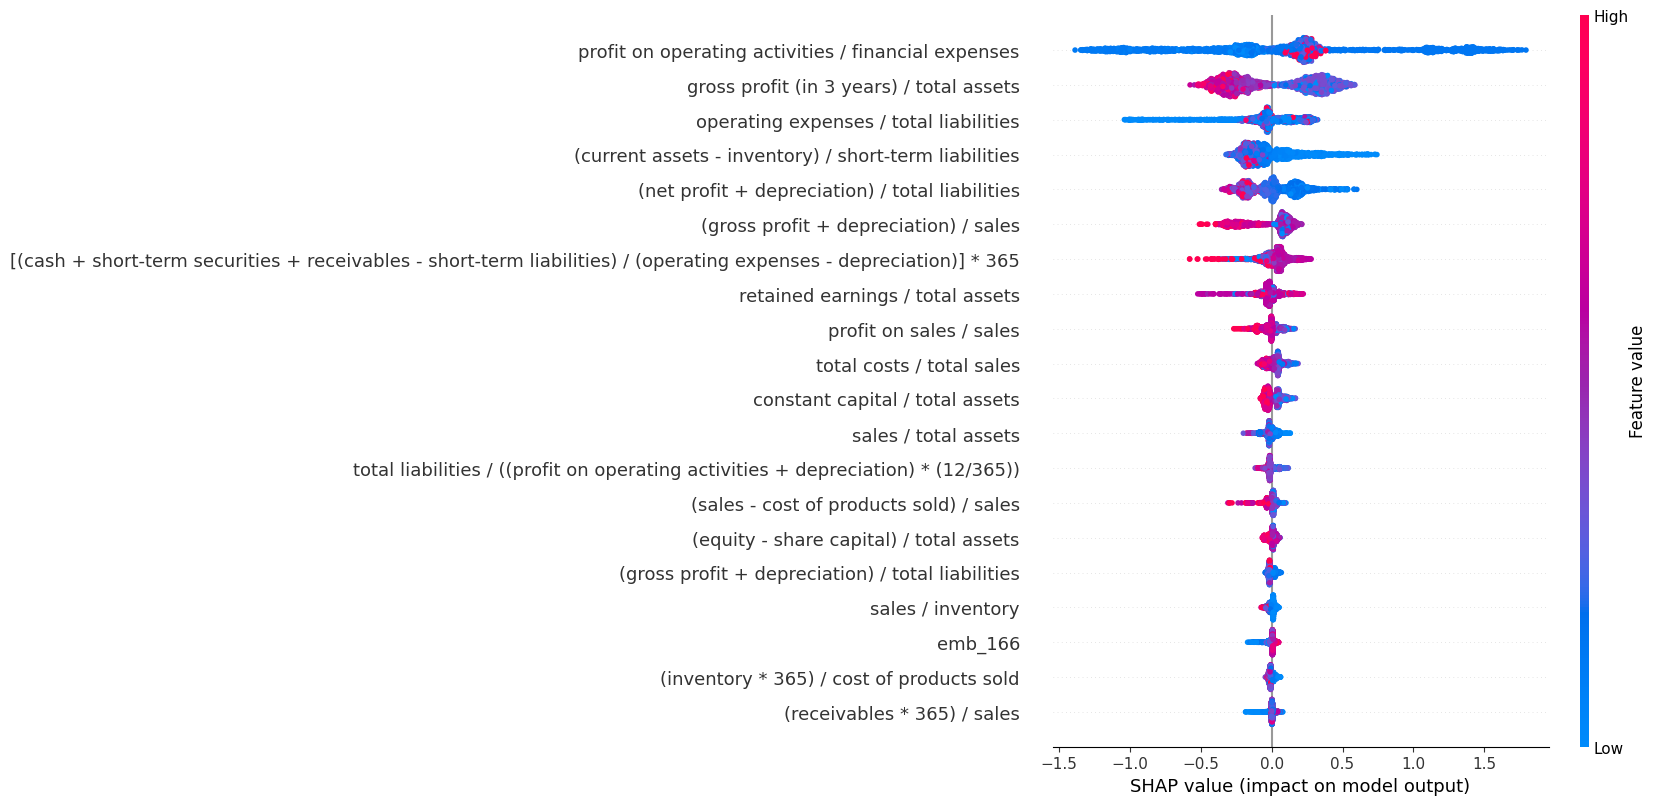

In [ ]:
corrected_feature_names = [column_name_mapping.get(col, col) for col in X_train_finbert_multimodal.columns]

# explainer = shap.TreeExplainer(xgb)
shap.summary_plot(shap_values, features=X_train_finbert_multimodal, feature_names=corrected_feature_names)
# shap.summary_plot(shap_values, plot_type='violin', feature_names=corrected_feature_names)

## PCA over embeddings

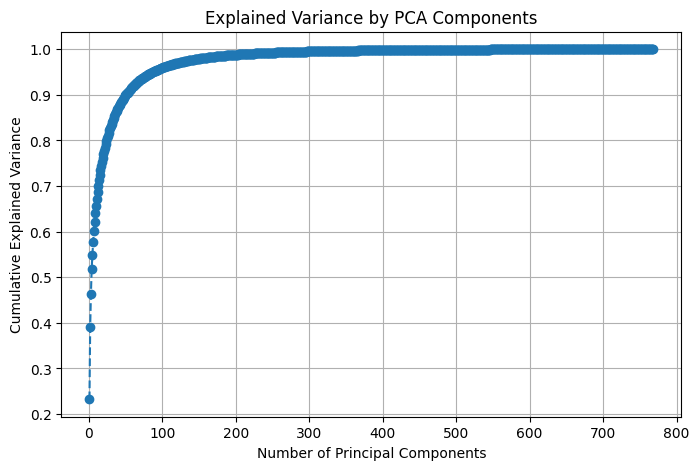

In [ ]:
scaler = StandardScaler()
X_train_embeddings_scaled = scaler.fit_transform(X_train_embeddings)

pca = PCA()
pca.fit(X_train_embeddings_scaled)

cumulative_variance = pca.explained_variance_ratio_.cumsum()

plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.title('Explained Variance by PCA Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid()
plt.show()

###Choose best components also integrating tabular data
-> suggests that the lower the better. we are not adding values with the embedding. all information is already there, we are just adding noise.

In [ ]:
def evaluate_pca_components(n_components, X_train_embeddings, X_test_embeddings, X_train_tabular, X_test_tabular, y_train, y_test):
    scaler = StandardScaler()
    X_train_embeddings_scaled = scaler.fit_transform(X_train_embeddings)
    X_test_embeddings_scaled = scaler.transform(X_test_embeddings)

    # Apply PCA
    pca = PCA(n_components=n_components)
    X_train_embeddings_reduced = pca.fit_transform(X_train_embeddings_scaled)
    X_test_embeddings_reduced = pca.transform(X_test_embeddings_scaled)

    # Combine reduced embeddings with tabular data
    X_train_multimodal_pca = pd.DataFrame(X_train_embeddings_reduced, index=X_train_embeddings.index)
    X_train_multimodal_pca = X_train_multimodal_pca.merge(X_train_tabular, left_index=True, right_index=True, how="inner")

    X_test_multimodal_pca = pd.DataFrame(X_test_embeddings_reduced, index=X_test_embeddings.index)
    X_test_multimodal_pca = X_test_multimodal_pca.merge(X_test_tabular, left_index=True, right_index=True, how="inner")

    # here we use fit_models, not fit_models_all (as in previous case). this only fits xgb and only returns the metric, not feature imporance
    results_pca = fit_models(X_train_multimodal_pca, y_train, X_test_multimodal_pca, y_test)
    return results_pca

Evaluating PCA components: 1
Using device: GPU
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best param:
{'subsample': 0.5, 'n_estimators': 200, 'max_depth': 10, 'learning_rate': 0.1, 'device': 'gpu'}
XGBoost
Performance Summary:
Train - AUC: 1.000, Sensitivity: 1.000
Test - AUC: 0.941, Sensitivity: 0.852
Evaluating PCA components: 3
Using device: GPU
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best param:
{'subsample': 0.5, 'n_estimators': 200, 'max_depth': 10, 'learning_rate': 0.1, 'device': 'gpu'}
XGBoost
Performance Summary:
Train - AUC: 1.000, Sensitivity: 1.000
Test - AUC: 0.940, Sensitivity: 0.852
Evaluating PCA components: 5
Using device: GPU
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best param:
{'subsample': 0.5, 'n_estimators': 200, 'max_depth': 10, 'learning_rate': 0.1, 'device': 'gpu'}
XGBoost
Performance Summary:
Train - AUC: 1.000, Sensitivity: 1.000
Test - AUC: 0.937, Sensitivity: 0.842
Evaluating PCA components: 7
Using

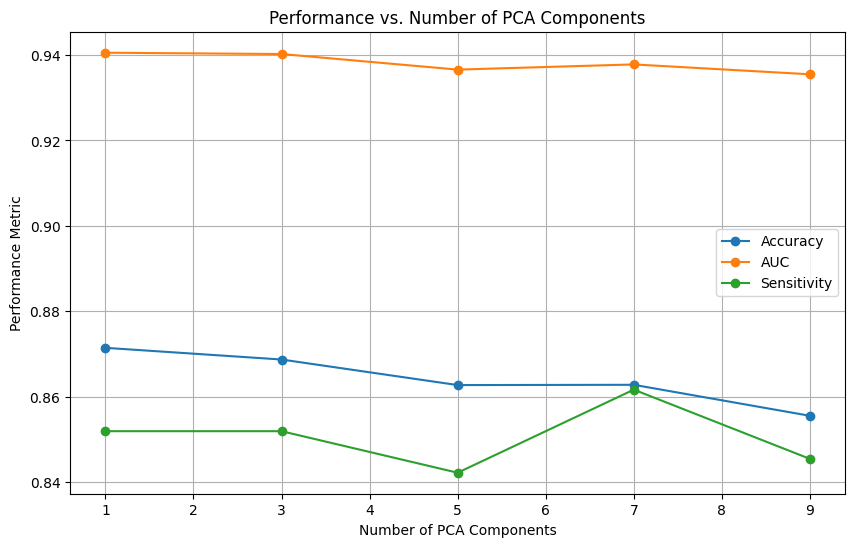

Optimal number of PCA components: 1


In [ ]:
# Step 2: Define a range of components to test
# component_range = range(10, 101, 20)  # Test components from 10 to 100 in steps of 20
component_range = range(1, 10, 2)  # from previous line, the lower seems the better, so try this

# Step 3: Iterate through each component count and evaluate
performance_metrics = []

for n_components in component_range:
    print(f"Evaluating PCA components: {n_components}")
    results = evaluate_pca_components(
        n_components,
        X_train_embeddings,
        X_test_embeddings,
        X_train_tabular,
        X_test_tabular,
        y_train,
        y_test
    )
    performance_metrics.append({"n_components": n_components, **results})

# Step 4: Analyze Results
performance_df = pd.DataFrame(performance_metrics)


plt.figure(figsize=(10, 6))
plt.plot(performance_df["n_components"], performance_df["accuracy_test"], marker="o", label="Accuracy")
plt.plot(performance_df["n_components"], performance_df["auc_test"], marker="o", label="AUC")
plt.plot(performance_df["n_components"], performance_df["sensitivity_test"], marker="o", label="Sensitivity")
plt.xlabel("Number of PCA Components")
plt.ylabel("Performance Metric")
plt.title("Performance vs. Number of PCA Components")
plt.legend()
plt.grid()
plt.show()

# Step 6: Find the Best Number of Components
best_n_components = performance_df.loc[performance_df["auc_test"].idxmax(), "n_components"]
print(f"Optimal number of PCA components: {best_n_components}")

In [ ]:
optimal_components = best_n_components  # Retain 95% of variance
print(f"Optimal number of components: {optimal_components}")
pca = PCA(n_components=optimal_components)

X_train_embeddings_reduced = pca.fit_transform(X_train_embeddings_scaled)
X_test_embeddings_scaled = scaler.transform(X_test_embeddings)
X_test_embeddings_reduced = pca.transform(X_test_embeddings_scaled)

X_train_multimodal_pca = pd.DataFrame(X_train_embeddings_reduced, index=X_train_embeddings.index)
X_train_multimodal_pca = X_train_multimodal_pca.merge(X_train_tabular, left_index=True, right_index=True, how="inner")

X_test_multimodal_pca = pd.DataFrame(X_test_embeddings_reduced, index=X_test_embeddings.index)
X_test_multimodal_pca = X_test_multimodal_pca.merge(X_test_tabular, left_index=True, right_index=True, how="inner")

Optimal number of components: 1


In [ ]:
results_pca = fit_models(X_train_multimodal_pca, y_train, X_test_multimodal_pca, y_test)

Using device: GPU
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best param:
{'subsample': 0.5, 'n_estimators': 200, 'max_depth': 10, 'learning_rate': 0.1, 'device': 'gpu'}
XGBoost
Performance Summary:
Train - AUC: 1.000, Sensitivity: 1.000
Test - AUC: 0.941, Sensitivity: 0.852


###Choose best component on embeddings only

In [ ]:
def evaluate_pca_components_emb_only(n_components, X_train_embeddings, X_test_embeddings, y_train, y_test):
    scaler = StandardScaler()
    X_train_embeddings_scaled = scaler.fit_transform(X_train_embeddings)
    X_test_embeddings_scaled = scaler.transform(X_test_embeddings)

    # Apply PCA
    pca = PCA(n_components=n_components)
    X_train_embeddings_reduced = pca.fit_transform(X_train_embeddings_scaled)
    X_test_embeddings_reduced = pca.transform(X_test_embeddings_scaled)

    # Combine reduced embeddings with tabular data
    X_train_multimodal_pca = pd.DataFrame(X_train_embeddings_reduced, index=X_train_embeddings.index)

    X_test_multimodal_pca = pd.DataFrame(X_test_embeddings_reduced, index=X_test_embeddings.index)

    # here we use fit_models, not fit_models_all (as in previous case). this only fits xgb and only returns the metric, not feature imporance
    results_pca = fit_models(X_train_multimodal_pca, y_train, X_test_multimodal_pca, y_test)
    return results_pca

Evaluating PCA components: 10
Using device: GPU
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best param:
{'subsample': 1.0, 'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.01, 'device': 'gpu'}
XGBoost
Performance Summary:
Train - AUC: 0.725, Sensitivity: 0.610
Test - AUC: 0.726, Sensitivity: 0.666
Evaluating PCA components: 30
Using device: GPU
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best param:
{'subsample': 0.5, 'n_estimators': 200, 'max_depth': 5, 'learning_rate': 0.01, 'device': 'gpu'}
XGBoost
Performance Summary:
Train - AUC: 0.888, Sensitivity: 0.754
Test - AUC: 0.740, Sensitivity: 0.715
Evaluating PCA components: 50
Using device: GPU
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best param:
{'subsample': 0.8, 'n_estimators': 200, 'max_depth': 5, 'learning_rate': 0.01, 'device': 'gpu'}
XGBoost
Performance Summary:
Train - AUC: 0.921, Sensitivity: 0.775
Test - AUC: 0.735, Sensitivity: 0.699
Evaluating PCA components: 70
U

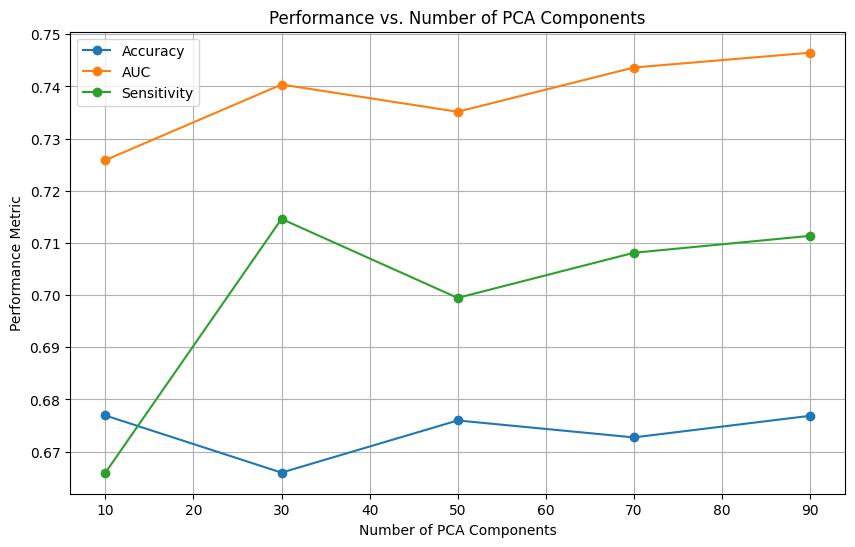

Optimal number of PCA components: 90


In [ ]:
# Step 2: Define a range of components to test
component_range = range(10, 101, 20)  # Test components from 10 to 100 in steps of 20

# Step 3: Iterate through each component count and evaluate
performance_metrics = []

for n_components in component_range:
    print(f"Evaluating PCA components: {n_components}")
    results = evaluate_pca_components_emb_only(
        n_components,
        X_train_embeddings,
        X_test_embeddings,
        y_train,
        y_test
    )
    performance_metrics.append({"n_components": n_components, **results})

# Step 4: Analyze Results
performance_df = pd.DataFrame(performance_metrics)


plt.figure(figsize=(10, 6))
plt.plot(performance_df["n_components"], performance_df["accuracy_test"], marker="o", label="Accuracy")
plt.plot(performance_df["n_components"], performance_df["auc_test"], marker="o", label="AUC")
plt.plot(performance_df["n_components"], performance_df["sensitivity_test"], marker="o", label="Sensitivity")
plt.xlabel("Number of PCA Components")
plt.ylabel("Performance Metric")
plt.title("Performance vs. Number of PCA Components")
plt.legend()
plt.grid()
plt.show()

# Step 6: Find the Best Number of Components
best_n_components = performance_df.loc[performance_df["auc_test"].idxmax(), "n_components"]
print(f"Optimal number of PCA components: {best_n_components}")

# Old

In [ ]:
accuracy_data = {
    'Model & Data Type': [
        'Logistic Regression with Tabular', 'Logistic Regression with Text', 'Logistic Regression with Tabular + Text',
        'Random Forest with Tabular', 'Random Forest with Text', 'Random Forest with Tabular + Text',
        'XGBoost with Tabular', 'XGBoost with Text', 'XGBoost with Tabular + Text',
    ],
    'Train Accuracy': [
        lr_metrics_tabular["accuracy_train"], lr_metrics_text["accuracy_train"], lr_metrics_multi["accuracy_train"],
        rf_metrics_tabular["accuracy_train"], rf_metrics_text["accuracy_train"], rf_metrics_multi["accuracy_train"],
        xgb_metrics_tabular["accuracy_train"], xgb_metrics_text["accuracy_train"], xgb_metrics_multi["accuracy_train"],
    ],
    'Test Accuracy': [
        lr_metrics_tabular["accuracy_test"], lr_metrics_text["accuracy_test"], lr_metrics_multi["accuracy_test"],
        rf_metrics_tabular["accuracy_test"], rf_metrics_text["accuracy_test"], rf_metrics_multi["accuracy_test"],
        xgb_metrics_tabular["accuracy_test"], xgb_metrics_text["accuracy_test"], xgb_metrics_multi["accuracy_test"],
    ],
    'Train AUC': [
        lr_metrics_tabular["auc_train"], lr_metrics_text["auc_train"], lr_metrics_multi["auc_train"],
        rf_metrics_tabular["auc_train"], rf_metrics_text["auc_train"], rf_metrics_multi["auc_train"],
        xgb_metrics_tabular["auc_train"], xgb_metrics_text["auc_train"], xgb_metrics_multi["auc_train"],
    ],
    'Test AUC': [
        lr_metrics_tabular["auc_test"], lr_metrics_text["auc_test"], lr_metrics_multi["auc_test"],
        rf_metrics_tabular["auc_test"], rf_metrics_text["auc_test"], rf_metrics_multi["auc_test"],
        xgb_metrics_tabular["auc_test"], xgb_metrics_text["auc_test"], xgb_metrics_multi["auc_test"],
    ],
}